In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the Data types, shape, EDA, 5 point summary). Perform Univariate, Bivariate Analysis, Multivariate Analysis.

In [2]:
df = pd.read_excel('compactiv.xlsx')
df.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  

[5 rows x 22 columns]

In [3]:
df.tail()

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  \
8187     16      12   3009    360     244   1.6  5.81  405250.0  85282.0   
8188      4       0   1596    170     146   2.4  1.80   89489.0  41764.0   
8189     16       5   3116    289     190   0.6  0.60  325948.0  52640.0   
8190     32      45   5180    254     179   1.2  1.20   62571.0  29505.0   
8191      2       0    985     55      46   1.6  4.80  111111.0  22256.0   

      pgout  ...  pgscan  atch   pgin  ppgin    pflt    vflt         runqsz  \
8187   8.02  ...   55.11   0.6  35.87  47.90  139.28  270.74      CPU_Bound   
8188   3.80  ...    0.20   0.8   3.80   4.40  122.40  212.60  Not_CPU_Bound   
8189   0.40  ...    0.00   0.4  28.40  45.20   60.20  219.80  Not_CPU_Bound   
8190   1.40  ...   18.04   0.4  23.05  24.25   93.19  202.81      CPU_Bound   
8191   0.00  ...    0.00   0.2   3.40   6.20   91.80  110.00      CPU_Bound   

      freemem freeswap  usr  
8187      387   986647   80  
8188      263  1055742   90  
8189      400   969106   87  
8190      141  1022458   83  
8191      659  1756514   94  

[5 rows x 22 columns]

In [4]:
print('Number of rows: ', df.shape[0], '\n''Number of columns: ', df.shape[1])

Number of rows:  8192 
Number of columns:  22


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [6]:
df.dtypes

lread         int64
lwrite        int64
scall         int64
sread         int64
swrite        int64
fork        float64
exec        float64
rchar       float64
wchar       float64
pgout       float64
ppgout      float64
pgfree      float64
pgscan      float64
atch        float64
pgin        float64
ppgin       float64
pflt        float64
vflt        float64
runqsz       object
freemem       int64
freeswap      int64
usr           int64
dtype: object

In [7]:
df.describe().T

count          mean            std     min        25%        50%  \
lread     8192.0  1.955969e+01      53.353799     0.0        2.0        7.0   
lwrite    8192.0  1.310620e+01      29.891726     0.0        0.0        1.0   
scall     8192.0  2.306318e+03    1633.617322   109.0     1012.0     2051.5   
sread     8192.0  2.104800e+02     198.980146     6.0       86.0      166.0   
swrite    8192.0  1.500582e+02     160.478980     7.0       63.0      117.0   
fork      8192.0  1.884554e+00       2.479493     0.0        0.4        0.8   
exec      8192.0  2.791998e+00       5.212456     0.0        0.2        1.2   
rchar     8088.0  1.973857e+05  239837.493526   278.0    34091.5   125473.5   
wchar     8177.0  9.590299e+04  140841.707911  1498.0    22916.0    46619.0   
pgout     8192.0  2.285317e+00       5.307038     0.0        0.0        0.0   
ppgout    8192.0  5.977229e+00      15.214590     0.0        0.0        0.0   
pgfree    8192.0  1.191971e+01      32.363520     0.0        0.0        0.0   
pgscan    8192.0  2.152685e+01      71.141340     0.0        0.0        0.0   
atch      8192.0  1.127505e+00       5.708347     0.0        0.0        0.0   
pgin      8192.0  8.277960e+00      13.874978     0.0        0.6        2.8   
ppgin     8192.0  1.238859e+01      22.281318     0.0        0.6        3.8   
pflt      8192.0  1.097938e+02     114.419221     0.0       25.0       63.8   
vflt      8192.0  1.853158e+02     191.000603     0.2       45.4      120.4   
freemem   8192.0  1.763456e+03    2482.104511    55.0      231.0      579.0   
freeswap  8192.0  1.328126e+06  422019.426957     2.0  1042623.5  1289289.5   
usr       8192.0  8.396887e+01      18.401905     0.0       81.0       89.0   

                  75%         max  
lread          20.000     1845.00  
lwrite         10.000      575.00  
scall        3317.250    12493.00  
sread         279.000     5318.00  
swrite        185.000     5456.00  
fork            2.200       20.12  
exec            2.800       59.56  
rchar      267828.750  2526649.00  
wchar      106101.000  1801623.00  
pgout           2.400       81.44  
ppgout          4.200      184.20  
pgfree          5.000      523.00  
pgscan          0.000     1237.00  
atch            0.600      211.58  
pgin            9.765      141.20  
ppgin          13.800      292.61  
pflt          159.600      899.80  
vflt          251.800     1365.00  
freemem      2002.250    12027.00  
freeswap  1730379.500  2243187.00  
usr            94.000       99.00

In [4]:
df.skew()

lread       13.897852
lwrite       5.277645
scall        0.902531
sread        5.459466
swrite       9.605844
fork         2.249689
exec         4.069238
rchar        2.854044
wchar        3.847654
pgout        5.066984
ppgout       4.680442
pgfree       4.768191
pgscan       5.813415
atch        21.542020
pgin         3.242412
ppgin        3.902765
pflt         1.720284
vflt         1.737327
freemem      1.807555
freeswap    -0.791664
usr         -3.416750
dtype: float64

# dependent variable

### usr

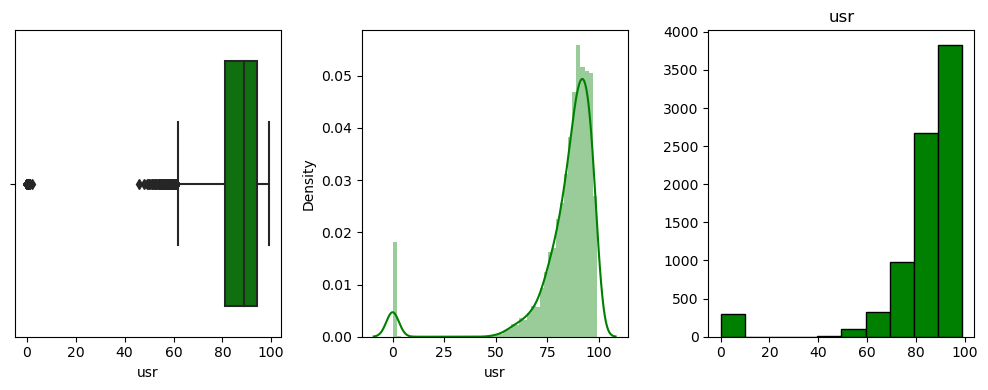

In [8]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('usr')
sns.boxplot(df['usr'],orient='horizondal',color='g', ax=axes[0])

sns.distplot(df['usr'], color='g',ax=axes[1])
df.hist(column='usr', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

In [9]:
print('Minimum usr: ', df['usr'].min())
print('Maximum usr: ',df['usr'].max())
print('Mean value: ', df['usr'].mean())
print('Median value: ',df['usr'].median())
print('Standard deviation: ', df['usr'].std())

Minimum usr:  0
Maximum usr:  99
Mean value:  83.9688720703125
Median value:  89.0
Standard deviation:  18.401904505037443


In [10]:
def detectoutlier(col):
    q1=col.quantile(0.25)
    q3=col.quantile(0.75)
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw, uw

In [11]:
lr, ur = detectoutlier(df['usr'])
print('Lower outliers in usr: ', lr)
print('Upper outliers in usr: ', ur)

Lower outliers in usr:  61.5
Upper outliers in usr:  113.5


In [12]:
print('Number of upper outliers in usr : ', df[df['usr']>113.5]['usr'].count())
print('Number of lower outliers in usr : ', df[df['usr']<61.5]['usr'].count())

Number of upper outliers in usr :  0
Number of lower outliers in usr :  430


# Independent variable

### lread

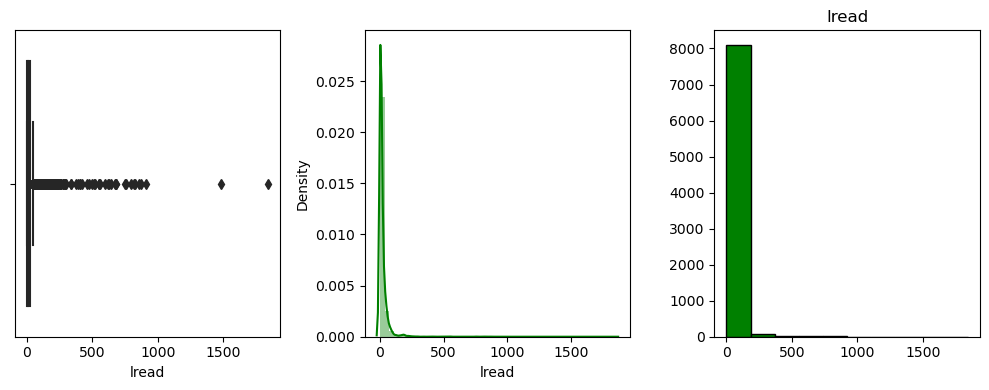

In [13]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('lread')
sns.boxplot(df['lread'],orient='horizondal',color='g', ax=axes[0])

sns.distplot(df['lread'], color='g',ax=axes[1])
df.hist(column='lread', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

In [14]:
print('Minimum lread: ', df['lread'].min())
print('Maximum lread: ',df['lread'].max())
print('Mean value: ', df['lread'].mean())
print('Median value: ',df['lread'].median())
print('Standard deviation: ', df['lread'].std())

Minimum lread:  0
Maximum lread:  1845
Mean value:  19.5596923828125
Median value:  7.0
Standard deviation:  53.353798938022095


In [15]:
lr, ur = detectoutlier(df['lread'])
print('Lower outliers in lread: ', lr)
print('Upper outliers in lread: ', ur)

Lower outliers in lread:  -25.0
Upper outliers in lread:  47.0


In [16]:
print('Number of upper outliers in lread : ', df[df['lread']>47.0]['lread'].count())
print('Number of lower outliers in lread : ', df[df['lread']<-25.0]['lread'].count())

Number of upper outliers in lread :  753
Number of lower outliers in lread :  0


### lwrite

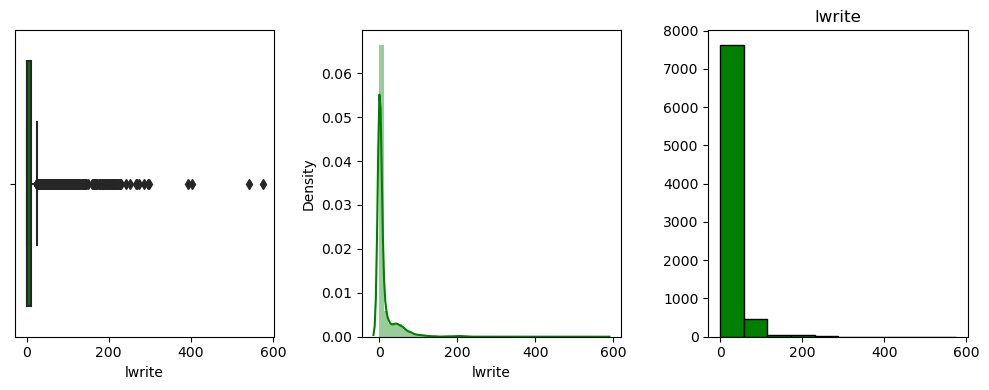

In [17]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('lwrite')
sns.boxplot(df['lwrite'],orient='horizondal',color='g', ax=axes[0])

sns.distplot(df['lwrite'], color='g',ax=axes[1])
df.hist(column='lwrite', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

In [18]:
print('Minimum lwrite: ', df['lwrite'].min())
print('Maximum lwrite: ',df['lwrite'].max())
print('Mean value: ', df['lwrite'].mean())
print('Median value: ',df['lwrite'].median())
print('Standard deviation: ', df['lwrite'].std())

Minimum lwrite:  0
Maximum lwrite:  575
Mean value:  13.106201171875
Median value:  1.0
Standard deviation:  29.891725836232645


In [19]:
lr, ur = detectoutlier(df['lwrite'])
print('Lower outliers in lwrite: ', lr)
print('Upper outliers in lwrite: ', ur)

Lower outliers in lwrite:  -15.0
Upper outliers in lwrite:  25.0


In [20]:
print('Number of upper outliers in lwrite : ', df[df['lwrite']>25.0]['lwrite'].count())
print('Number of lower outliers in lwrite : ', df[df['lwrite']<-15.0]['lwrite'].count())

Number of upper outliers in lwrite :  1305
Number of lower outliers in lwrite :  0


### scall

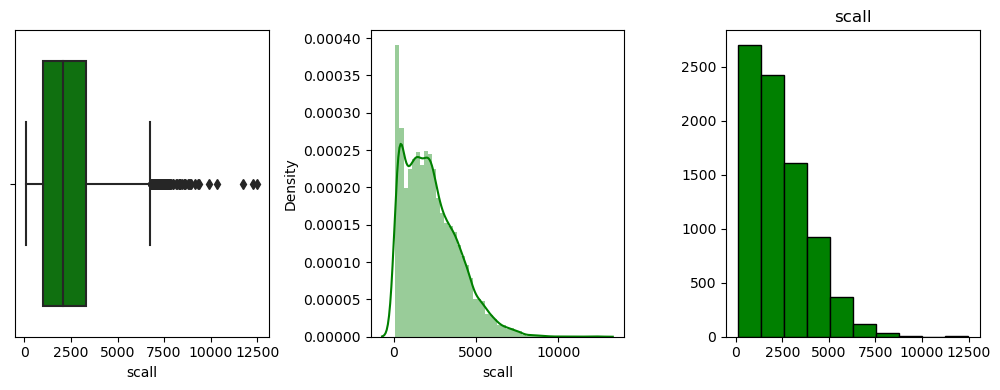

In [21]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('scall')
sns.boxplot(df['scall'],orient='horizondal',color='g', ax=axes[0])

sns.distplot(df['scall'], color='g',ax=axes[1])
df.hist(column='scall', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

In [22]:
print('Minimum scall: ', df['scall'].min())
print('Maximum scall: ',df['scall'].max())
print('Mean value: ', df['scall'].mean())
print('Median value: ',df['scall'].median())
print('Standard deviation: ', df['scall'].std())

Minimum scall:  109
Maximum scall:  12493
Mean value:  2306.3182373046875
Median value:  2051.5
Standard deviation:  1633.6173217942762


In [23]:
lr, ur = detectoutlier(df['scall'])
print('Lower outliers in scall: ', lr)
print('Upper outliers in scall: ', ur)

Lower outliers in scall:  -2445.875
Upper outliers in scall:  6775.125


In [24]:
print('Number of upper outliers in scall : ', df[df['scall']>6775.125]['scall'].count())
print('Number of lower outliers in scall : ', df[df['scall']<-2445.875]['scall'].count())

Number of upper outliers in scall :  108
Number of lower outliers in scall :  0


### sread

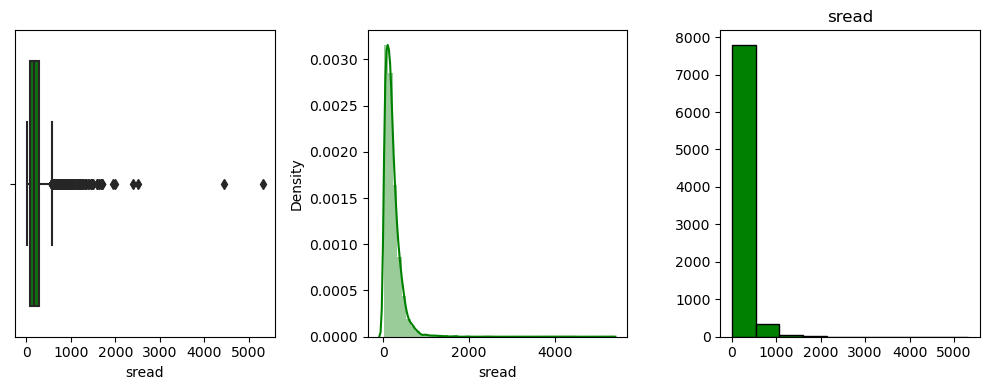

In [25]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('sread')
sns.boxplot(df['sread'],orient='horizondal',color='g', ax=axes[0])

sns.distplot(df['sread'], color='g',ax=axes[1])
df.hist(column='sread', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

In [26]:
print('Minimum lwrite: ', df['sread'].min())
print('Maximum lwrite: ',df['sread'].max())
print('Mean value: ', df['sread'].mean())
print('Median value: ',df['sread'].median())
print('Standard deviation: ', df['sread'].std())

Minimum lwrite:  6
Maximum lwrite:  5318
Mean value:  210.47998046875
Median value:  166.0
Standard deviation:  198.98014627162982


In [27]:
lr, ur = detectoutlier(df['sread'])
print('Lower outliers in sread: ', lr)
print('Upper outliers in sread: ', ur)

Lower outliers in sread:  -203.5
Upper outliers in sread:  568.5


In [28]:
print('Number of upper outliers in sread : ', df[df['sread']>568.5]['sread'].count())
print('Number of lower outliers in sread : ', df[df['sread']<-203.5]['sread'].count())

Number of upper outliers in sread :  340
Number of lower outliers in sread :  0


### swrite

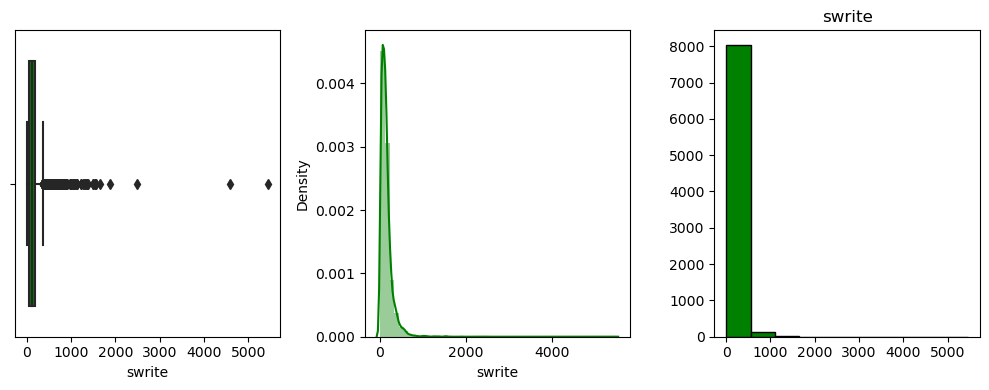

In [29]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('swrite')
sns.boxplot(df['swrite'],orient='horizondal',color='g', ax=axes[0])

sns.distplot(df['swrite'], color='g',ax=axes[1])
df.hist(column='swrite', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

In [30]:
print('Minimum swrite: ', df['swrite'].min())
print('Maximum swrite: ',df['swrite'].max())
print('Mean value: ', df['swrite'].mean())
print('Median value: ',df['swrite'].median())
print('Standard deviation: ', df['swrite'].std())

Minimum swrite:  7
Maximum swrite:  5456
Mean value:  150.0582275390625
Median value:  117.0
Standard deviation:  160.47897998993196


In [31]:
lr, ur = detectoutlier(df['swrite'])
print('Lower outliers in swrite: ', lr)
print('Upper outliers in swrite: ', ur)

Lower outliers in swrite:  -120.0
Upper outliers in swrite:  368.0


In [32]:
print('Number of upper outliers in swrite : ', df[df['swrite']>368.0]['swrite'].count())
print('Number of lower outliers in swrite : ', df[df['swrite']<-120.0]['swrite'].count())

Number of upper outliers in swrite :  495
Number of lower outliers in swrite :  0


### fork

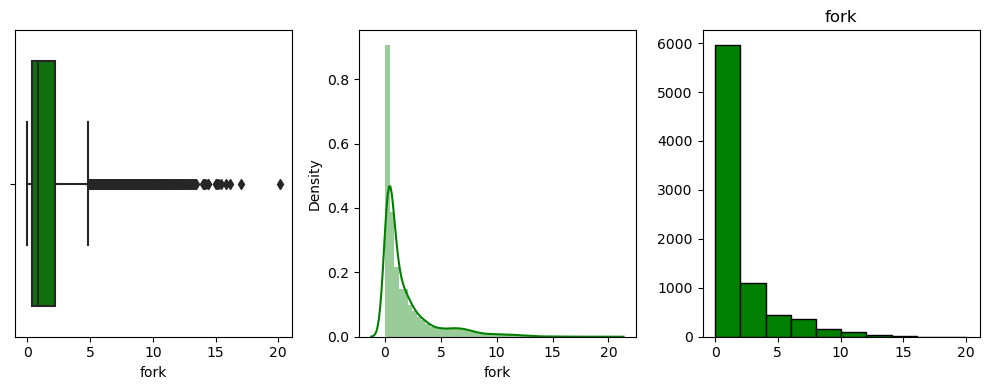

In [33]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('fork')
sns.boxplot(df['fork'],orient='horizondal',color='g', ax=axes[0])

sns.distplot(df['fork'], color='g',ax=axes[1])
df.hist(column='fork', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

In [34]:
print('Minimum fork: ', df['fork'].min())
print('Maximum fork: ',df['fork'].max())
print('Mean value: ', df['fork'].mean())
print('Median value: ',df['fork'].median())
print('Standard deviation: ', df['fork'].std())

Minimum fork:  0.0
Maximum fork:  20.12
Mean value:  1.8845544433594177
Median value:  0.8
Standard deviation:  2.4794934268871187


In [35]:
lr, ur = detectoutlier(df['fork'])
print('Lower outliers in fork: ', lr)
print('Upper outliers in fork: ', ur)

Lower outliers in fork:  -2.3000000000000003
Upper outliers in fork:  4.9


In [36]:
print('Number of upper outliers in fork : ', df[df['fork']>4.9]['fork'].count())
print('Number of lower outliers in fork : ', df[df['fork']<-2.3000000000000003]['fork'].count())

Number of upper outliers in fork :  943
Number of lower outliers in fork :  0


### exec

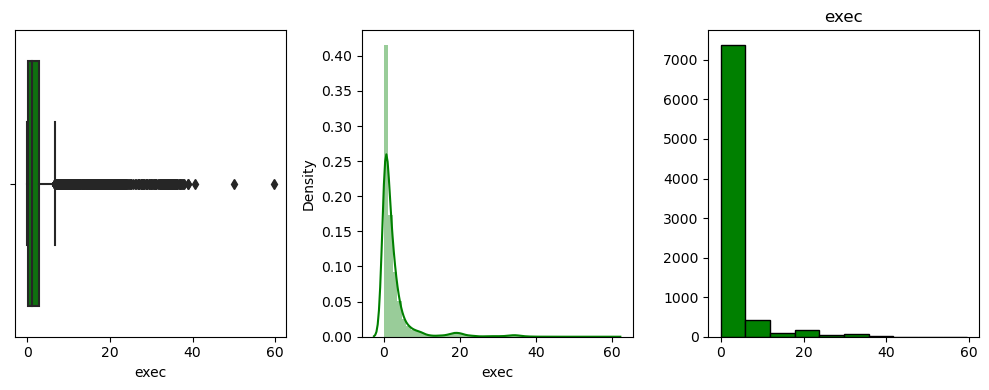

In [37]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('exec')
sns.boxplot(df['exec'],orient='horizondal',color='g', ax=axes[0])

sns.distplot(df['exec'], color='g',ax=axes[1])
df.hist(column='exec', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

In [38]:
print('Minimum exec: ', df['exec'].min())
print('Maximum exec: ',df['exec'].max())
print('Mean value: ', df['exec'].mean())
print('Median value: ',df['exec'].median())
print('Standard deviation: ', df['exec'].std())

Minimum exec:  0.0
Maximum exec:  59.56
Mean value:  2.791998291015726
Median value:  1.2
Standard deviation:  5.212456003982409


In [39]:
lr, ur = detectoutlier(df['exec'])
print('Lower outliers in exec: ', lr)
print('Upper outliers in exec: ', ur)

Lower outliers in exec:  -3.6999999999999993
Upper outliers in exec:  6.699999999999999


In [40]:
print('Number of upper outliers in exec : ', df[df['exec']>6.699999999999999]['exec'].count())
print('Number of lower outliers in exec : ', df[df['exec']<-3.6999999999999993]['exec'].count())

Number of upper outliers in exec :  710
Number of lower outliers in exec :  0


### rchar

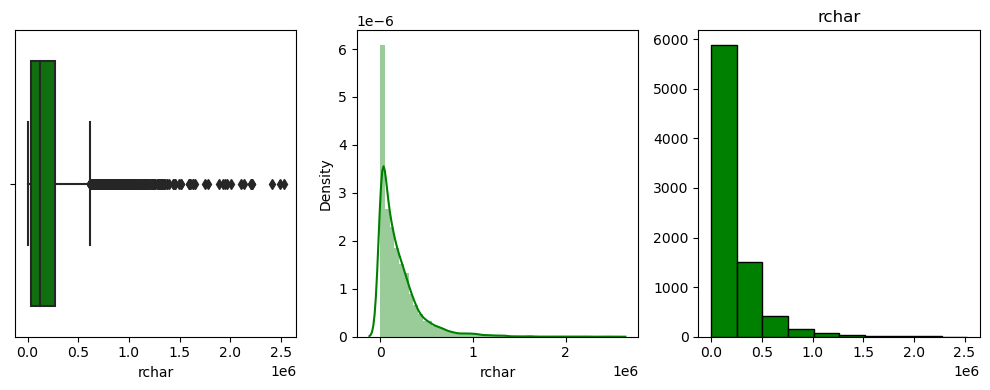

In [41]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('rchar')
sns.boxplot(df['rchar'],orient='horizondal',color='g', ax=axes[0])

sns.distplot(df['rchar'], color='g',ax=axes[1])
df.hist(column='rchar', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

In [42]:
print('Minimum rchar: ', df['rchar'].min())
print('Maximum rchar: ',df['rchar'].max())
print('Mean value: ', df['rchar'].mean())
print('Median value: ',df['rchar'].median())
print('Standard deviation: ', df['rchar'].std())

Minimum rchar:  278.0
Maximum rchar:  2526649.0
Mean value:  197385.72836300693
Median value:  125473.5
Standard deviation:  239837.4935258939


In [43]:
lr, ur = detectoutlier(df['rchar'])
print('Lower outliers in rchar: ', lr)
print('Upper outliers in rchar: ', ur)

Lower outliers in rchar:  -316514.375
Upper outliers in rchar:  618434.625


In [44]:
print('Number of upper outliers in rchar : ', df[df['rchar']>611196.125]['rchar'].count())
print('Number of lower outliers in rchar : ', df[df['rchar']<-310940.875]['rchar'].count())

Number of upper outliers in rchar :  465
Number of lower outliers in rchar :  0


### wchar

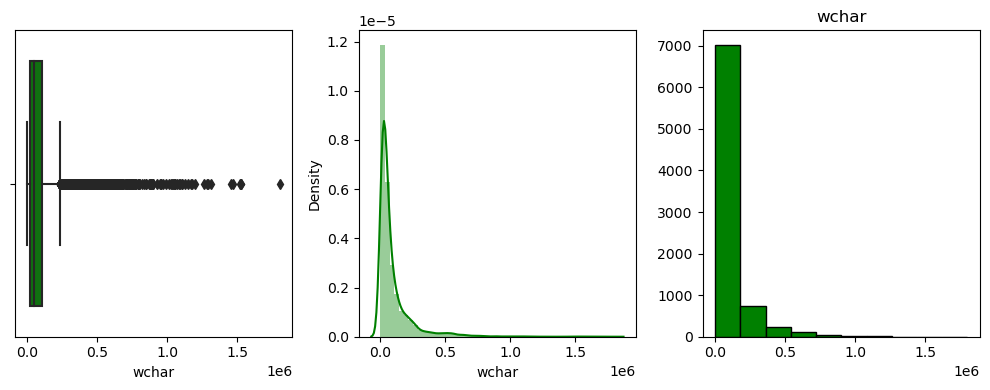

In [45]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('wchar')
sns.boxplot(df['wchar'],orient='horizondal',color='g', ax=axes[0])

sns.distplot(df['wchar'], color='g',ax=axes[1])
df.hist(column='wchar', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

In [46]:
print('Minimum wchar: ', df['wchar'].min())
print('Maximum wchar: ',df['wchar'].max())
print('Mean value: ', df['wchar'].mean())
print('Median value: ',df['wchar'].median())
print('Standard deviation: ', df['wchar'].std())

Minimum wchar:  1498.0
Maximum wchar:  1801623.0
Mean value:  95902.99278463985
Median value:  46619.0
Standard deviation:  140841.70791075978


In [47]:
lr, ur = detectoutlier(df['wchar'])
print('Lower outliers in wchar: ', lr)
print('Upper outliers in wchar: ', ur)

Lower outliers in wchar:  -101861.5
Upper outliers in wchar:  230878.5


In [48]:
print('Number of upper outliers in wchar : ', df[df['wchar']>230625.875]['wchar'].count())
print('Number of lower outliers in wchar : ', df[df['wchar']<-101611.125]['wchar'].count())

Number of upper outliers in wchar :  817
Number of lower outliers in wchar :  0


### pgout

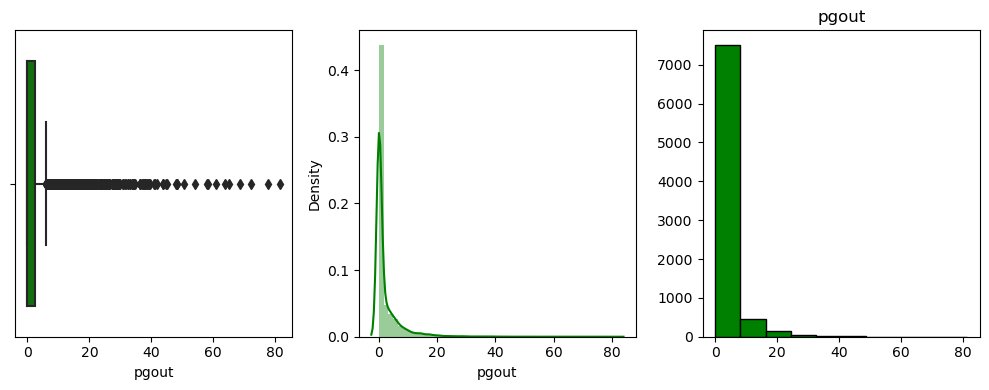

In [49]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('pgout')
sns.boxplot(df['pgout'],orient='horizondal',color='g', ax=axes[0])

sns.distplot(df['pgout'], color='g',ax=axes[1])
df.hist(column='pgout', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

In [50]:
print('Minimum pgout: ', df['pgout'].min())
print('Maximum pgout: ',df['pgout'].max())
print('Mean value: ', df['pgout'].mean())
print('Median value: ',df['pgout'].median())
print('Standard deviation: ', df['pgout'].std())

Minimum pgout:  0.0
Maximum pgout:  81.44
Mean value:  2.2853173828125057
Median value:  0.0
Standard deviation:  5.3070377344323045


In [51]:
lr, ur = detectoutlier(df['pgout'])
print('Lower outliers in pgout: ', lr)
print('Upper outliers in pgout: ', ur)

Lower outliers in pgout:  -3.5999999999999996
Upper outliers in pgout:  6.0


In [52]:
print('Number of upper outliers in pgout : ', df[df['pgout']>6.0]['pgout'].count())
print('Number of lower outliers in pgout : ', df[df['pgout']<-3.5999999999999996]['pgout'].count())

Number of upper outliers in pgout :  988
Number of lower outliers in pgout :  0


### ppgout

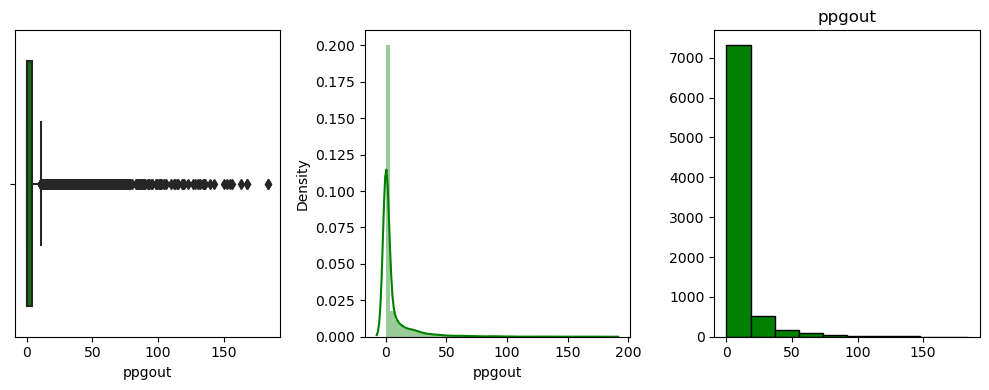

In [53]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('ppgout')
sns.boxplot(df['ppgout'],orient='horizondal',color='g', ax=axes[0])

sns.distplot(df['ppgout'], color='g',ax=axes[1])
df.hist(column='ppgout', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

In [54]:
print('Minimum ppgout: ', df['ppgout'].min())
print('Maximum ppgout: ',df['ppgout'].max())
print('Mean value: ', df['ppgout'].mean())
print('Median value: ',df['ppgout'].median())
print('Standard deviation: ', df['ppgout'].std())

Minimum ppgout:  0.0
Maximum ppgout:  184.2
Mean value:  5.9772290039062375
Median value:  0.0
Standard deviation:  15.214589975605616


In [55]:
lr, ur = detectoutlier(df['ppgout'])
print('Lower outliers in ppgout: ', lr)
print('Upper outliers in ppgout: ', ur)

Lower outliers in ppgout:  -6.300000000000001
Upper outliers in ppgout:  10.5


In [56]:
print('Number of upper outliers in ppgout : ', df[df['ppgout']>10.5]['ppgout'].count())
print('Number of lower outliers in ppgout : ', df[df['ppgout']<-6.300000000000001]['ppgout'].count())

Number of upper outliers in ppgout :  1315
Number of lower outliers in ppgout :  0


### pgfree

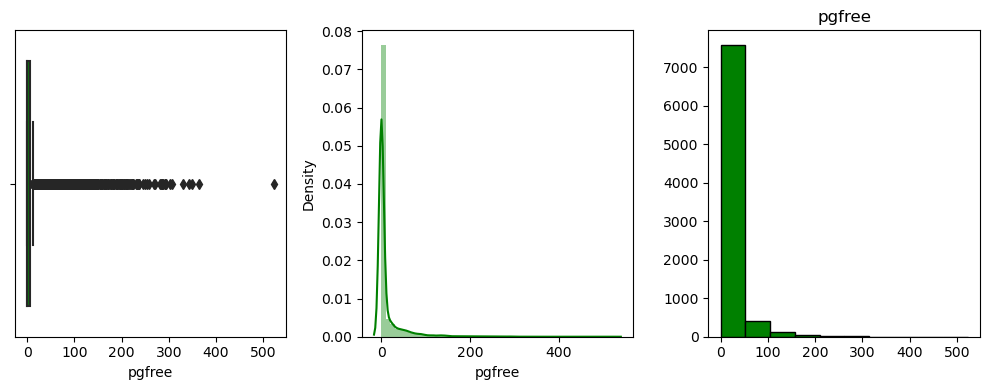

In [57]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('pgfree')
sns.boxplot(df['pgfree'],orient='horizondal',color='g', ax=axes[0])

sns.distplot(df['pgfree'], color='g',ax=axes[1])
df.hist(column='pgfree', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

In [58]:
print('Minimum pgfree: ', df['pgfree'].min())
print('Maximum pgfree: ',df['pgfree'].max())
print('Mean value: ', df['pgfree'].mean())
print('Median value: ',df['pgfree'].median())
print('Standard deviation: ', df['pgfree'].std())

Minimum pgfree:  0.0
Maximum pgfree:  523.0
Mean value:  11.919711914062447
Median value:  0.0
Standard deviation:  32.36351979003194


In [59]:
lr, ur = detectoutlier(df['pgfree'])
print('Lower outliers in pgfree: ', lr)
print('Upper outliers in pgfree: ', ur)

Lower outliers in pgfree:  -7.5
Upper outliers in pgfree:  12.5


In [60]:
print('Number of upper outliers in pgfree : ', df[df['pgfree']>12.5]['pgfree'].count())
print('Number of lower outliers in pgfree : ', df[df['pgfree']<-7.5]['pgfree'].count())

Number of upper outliers in pgfree :  1555
Number of lower outliers in pgfree :  0


### pgscan

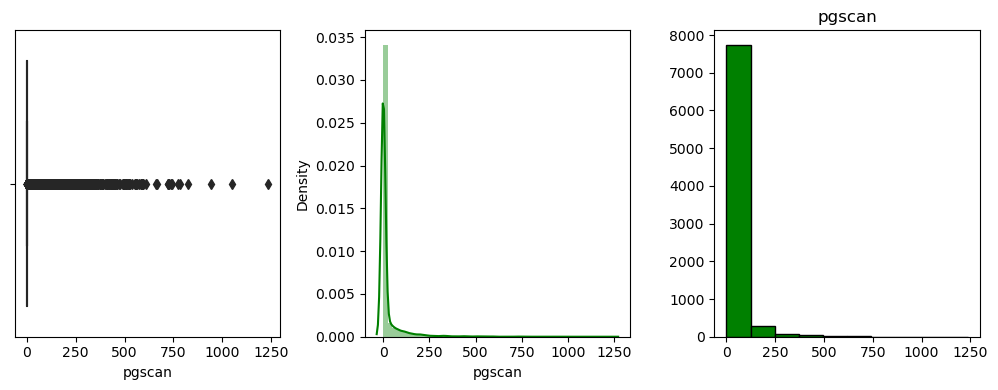

In [61]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('pgscan')
sns.boxplot(df['pgscan'],orient='horizondal',color='g', ax=axes[0])

sns.distplot(df['pgscan'], color='g',ax=axes[1])
df.hist(column='pgscan', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

In [62]:
print('Minimum pgscan: ', df['pgscan'].min())
print('Maximum pgscan: ',df['pgscan'].max())
print('Mean value: ', df['pgscan'].mean())
print('Median value: ',df['pgscan'].median())
print('Standard deviation: ', df['pgscan'].std())

Minimum pgscan:  0.0
Maximum pgscan:  1237.0
Mean value:  21.526849365234373
Median value:  0.0
Standard deviation:  71.14134025838428


In [63]:
lr, ur = detectoutlier(df['pgscan'])
print('Lower outliers in pgscan: ', lr)
print('Upper outliers in pgscan: ', ur)

Lower outliers in pgscan:  0.0
Upper outliers in pgscan:  0.0


In [64]:
print('Number of upper outliers in pgscan : ', df[df['pgscan']>0.0]['pgscan'].count())
print('Number of lower outliers in pgscan : ', df[df['pgscan']<0.0]['pgscan'].count())

Number of upper outliers in pgscan :  1744
Number of lower outliers in pgscan :  0


### atch

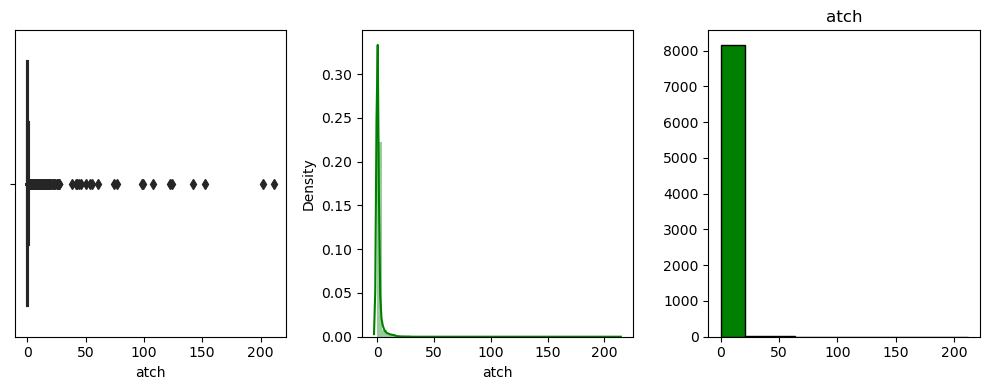

In [65]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('atch')
sns.boxplot(df['atch'],orient='horizondal',color='g', ax=axes[0])

sns.distplot(df['atch'], color='g',ax=axes[1])
df.hist(column='atch', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

In [66]:
print('Minimum atch: ', df['atch'].min())
print('Maximum atch: ',df['atch'].max())
print('Mean value: ', df['atch'].mean())
print('Median value: ',df['atch'].median())
print('Standard deviation: ', df['atch'].std())

Minimum atch:  0.0
Maximum atch:  211.58
Mean value:  1.1275048828124938
Median value:  0.0
Standard deviation:  5.708347378074512


In [67]:
lr, ur = detectoutlier(df['atch'])
print('Lower outliers in atch: ', lr)
print('Upper outliers in atch: ', ur)

Lower outliers in atch:  -0.8999999999999999
Upper outliers in atch:  1.5


In [68]:
print('Number of upper outliers in atch : ', df[df['atch']>1.5]['atch'].count())
print('Number of lower outliers in atch : ', df[df['atch']<-0.8999999999999999]['atch'].count())

Number of upper outliers in atch :  1209
Number of lower outliers in atch :  0


### pgin

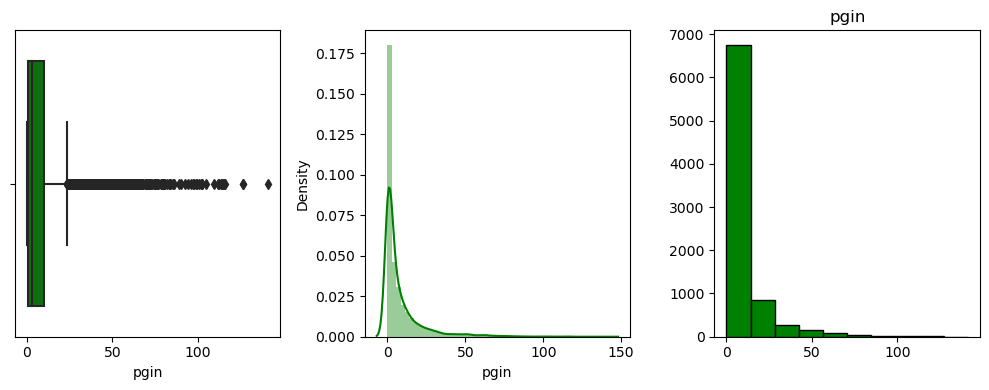

In [69]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('pgin')
sns.boxplot(df['pgin'],orient='horizondal',color='g', ax=axes[0])

sns.distplot(df['pgin'], color='g',ax=axes[1])
df.hist(column='pgin', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

In [70]:
print('Minimum pgin: ', df['pgin'].min())
print('Maximum pgin: ',df['pgin'].max())
print('Mean value: ', df['pgin'].mean())
print('Median value: ',df['pgin'].median())
print('Standard deviation: ', df['pgin'].std())

Minimum pgin:  0.0
Maximum pgin:  141.2
Mean value:  8.27796020507806
Median value:  2.8
Standard deviation:  13.874978388216434


In [71]:
lr, ur = detectoutlier(df['pgin'])
print('Lower outliers in pgin: ', lr)
print('Upper outliers in pgin: ', ur)

Lower outliers in pgin:  -13.147500000000003
Upper outliers in pgin:  23.512500000000003


In [72]:
print('Number of upper outliers in pgin : ', df[df['pgin']>23.512500000000003]['pgin'].count())
print('Number of lower outliers in pgin : ', df[df['pgin']<-13.147500000000003]['pgin'].count())

Number of upper outliers in pgin :  789
Number of lower outliers in pgin :  0


### ppgin

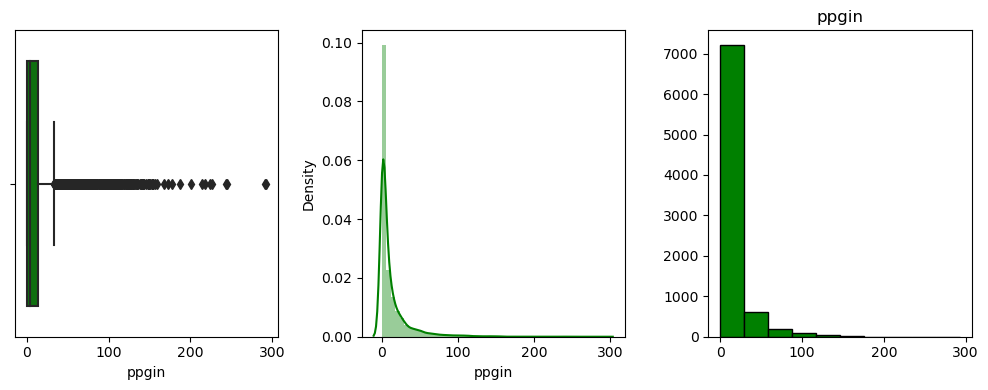

In [73]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('ppgin')
sns.boxplot(df['ppgin'],orient='horizondal',color='g', ax=axes[0])

sns.distplot(df['ppgin'], color='g',ax=axes[1])
df.hist(column='ppgin', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

In [74]:
print('Minimum ppgin: ', df['ppgin'].min())
print('Maximum ppgin: ',df['ppgin'].max())
print('Mean value: ', df['ppgin'].mean())
print('Median value: ',df['ppgin'].median())
print('Standard deviation: ', df['ppgin'].std())

Minimum ppgin:  0.0
Maximum ppgin:  292.61
Mean value:  12.38858642578118
Median value:  3.8
Standard deviation:  22.281318072645952


In [75]:
lr, ur = detectoutlier(df['ppgin'])
print('Lower outliers in ppgin: ', lr)
print('Upper outliers in ppgin: ', ur)

Lower outliers in ppgin:  -19.2
Upper outliers in ppgin:  33.6


In [76]:
print('Number of upper outliers in ppgin : ', df[df['ppgin']>33.6]['ppgin'].count())
print('Number of lower outliers in ppgin : ', df[df['ppgin']<-19.2]['ppgin'].count())

Number of upper outliers in ppgin :  821
Number of lower outliers in ppgin :  0


### pflt

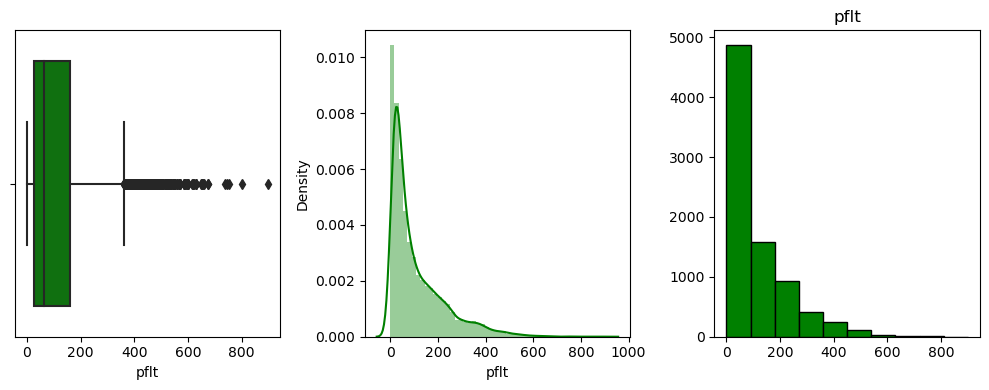

In [77]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('pflt')
sns.boxplot(df['pflt'],orient='horizondal',color='g', ax=axes[0])

sns.distplot(df['pflt'], color='g',ax=axes[1])
df.hist(column='pflt', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

In [78]:
print('Minimum pflt: ', df['pflt'].min())
print('Maximum pflt: ',df['pflt'].max())
print('Mean value: ', df['pflt'].mean())
print('Median value: ',df['pflt'].median())
print('Standard deviation: ', df['pflt'].std())

Minimum pflt:  0.0
Maximum pflt:  899.8
Mean value:  109.7937988281245
Median value:  63.8
Standard deviation:  114.41922063293286


In [79]:
lr, ur = detectoutlier(df['pflt'])
print('Lower outliers in pflt: ', lr)
print('Upper outliers in pflt: ', ur)

Lower outliers in pflt:  -176.89999999999998
Upper outliers in pflt:  361.5


In [80]:
print('Number of upper outliers in pflt : ', df[df['pflt']>361.5]['pflt'].count())
print('Number of lower outliers in pflt : ', df[df['pflt']<-176.89999999999998]['pflt'].count())

Number of upper outliers in pflt :  395
Number of lower outliers in pflt :  0


### vflt

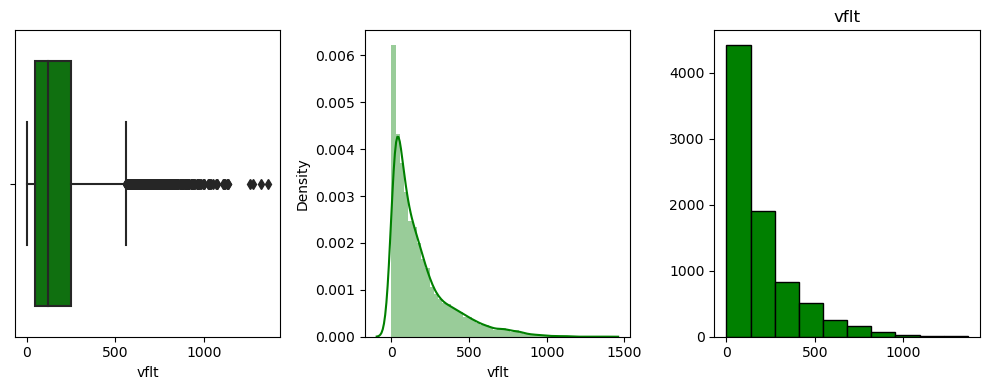

In [81]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('vflt')
sns.boxplot(df['vflt'],orient='horizondal',color='g', ax=axes[0])

sns.distplot(df['vflt'], color='g',ax=axes[1])
df.hist(column='vflt', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

In [82]:
print('Minimum vflt: ', df['vflt'].min())
print('Maximum vflt: ',df['vflt'].max())
print('Mean value: ', df['vflt'].mean())
print('Median value: ',df['vflt'].median())
print('Standard deviation: ', df['vflt'].std())

Minimum vflt:  0.2
Maximum vflt:  1365.0
Mean value:  185.31579589843813
Median value:  120.4
Standard deviation:  191.00060323756847


In [83]:
lr, ur = detectoutlier(df['vflt'])
print('Lower outliers in vflt: ', lr)
print('Upper outliers in vflt: ', ur)

Lower outliers in vflt:  -264.20000000000005
Upper outliers in vflt:  561.4000000000001


In [84]:
print('Number of upper outliers in vflt : ', df[df['vflt']>561.4000000000001]['vflt'].count())
print('Number of lower outliers in vflt : ', df[df['vflt']<-264.20000000000005]['vflt'].count())

Number of upper outliers in vflt :  484
Number of lower outliers in vflt :  0


### runqsz

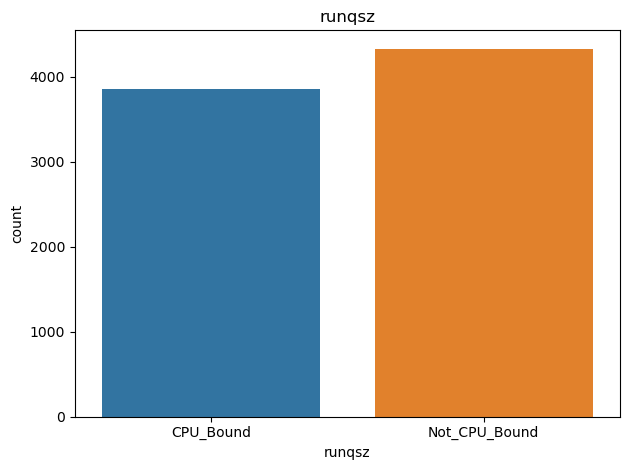

In [85]:
plt.title('runqsz')
sns.countplot(df['runqsz'])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

### freemem

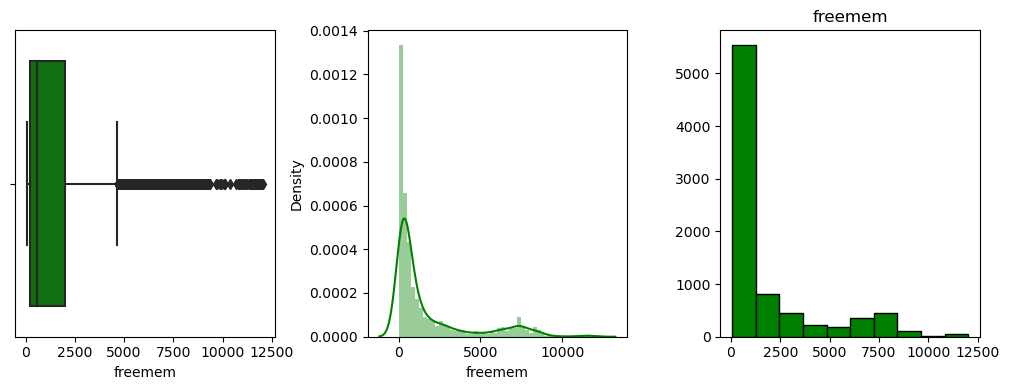

In [86]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('freemem')
sns.boxplot(df['freemem'],orient='horizondal',color='g', ax=axes[0])

sns.distplot(df['freemem'], color='g',ax=axes[1])
df.hist(column='freemem', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

In [87]:
print('Minimum freemem: ', df['freemem'].min())
print('Maximum freemem: ',df['freemem'].max())
print('Mean value: ', df['freemem'].mean())
print('Median value: ',df['freemem'].median())
print('Standard deviation: ', df['freemem'].std())

Minimum freemem:  55
Maximum freemem:  12027
Mean value:  1763.456298828125
Median value:  579.0
Standard deviation:  2482.104510917997


In [88]:
lr, ur = detectoutlier(df['freemem'])
print('Lower outliers in freemem: ', lr)
print('Upper outliers in freemem: ', ur)

Lower outliers in freemem:  -2425.875
Upper outliers in freemem:  4659.125


In [89]:
print('Number of upper outliers in freemem : ', df[df['freemem']>4659.125]['freemem'].count())
print('Number of lower outliers in freemem : ', df[df['freemem']<-2425.875]['freemem'].count())

Number of upper outliers in freemem :  1185
Number of lower outliers in freemem :  0


### freeswap 

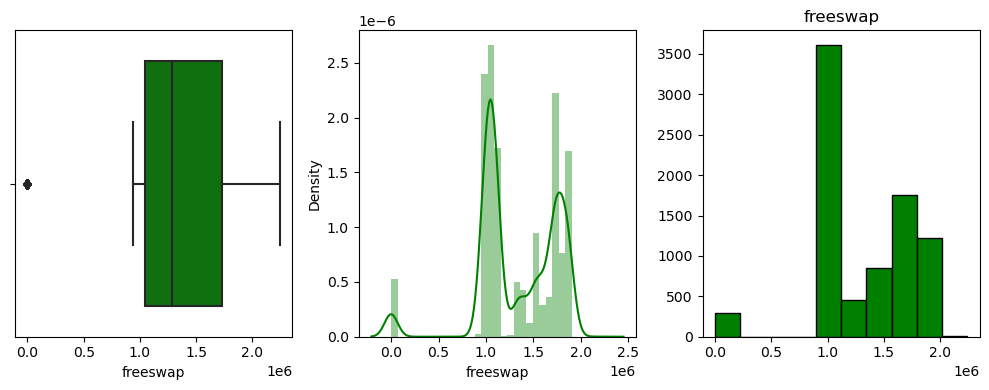

In [90]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(10, 4)

plt.title('freeswap')
sns.boxplot(df['freeswap'],orient='horizondal',color='g', ax=axes[0])

sns.distplot(df['freeswap'], color='g',ax=axes[1])
df.hist(column='freeswap', grid=False, color='g',edgecolor='black',ax=axes[2])

plt.subplots_adjust()
plt.tight_layout()

plt.show()

In [91]:
print('Minimum freeswap: ', df['freeswap'].min())
print('Maximum freeswap: ',df['freeswap'].max())
print('Mean value: ', df['freeswap'].mean())
print('Median value: ',df['freeswap'].median())
print('Standard deviation: ', df['freeswap'].std())

Minimum freeswap:  2
Maximum freeswap:  2243187
Mean value:  1328125.9598388672
Median value:  1289289.5
Standard deviation:  422019.4269568002


In [92]:
lr, ur = detectoutlier(df['freeswap'])
print('Lower outliers in freeswap: ', lr)
print('Upper outliers in freeswap: ', ur)

Lower outliers in freeswap:  10989.5
Upper outliers in freeswap:  2762013.5


In [93]:
print('Number of upper outliers in freeswap : ', df[df['freeswap']>2762013.5]['freeswap'].count())
print('Number of lower outliers in freeswap : ', df[df['freeswap']<10989.5]['freeswap'].count())

Number of upper outliers in freeswap :  0
Number of lower outliers in freeswap :  294


# Bivariate Analysis

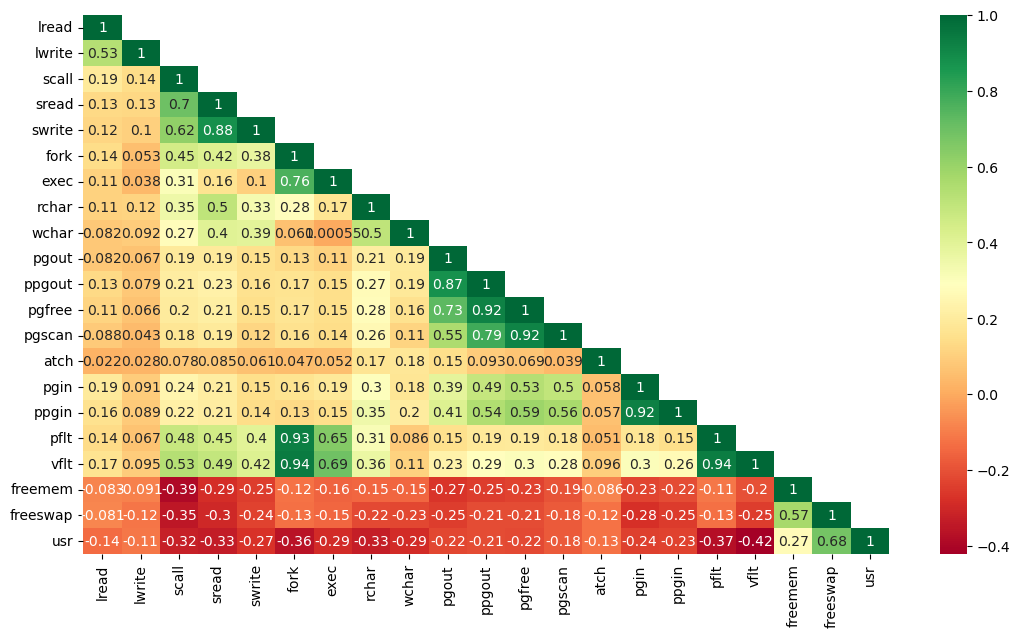

In [94]:
plt.figure(figsize=(13,7))

sns.heatmap(df.corr(),annot=True,mask=np.triu(df.corr(),+1),cmap='RdYlGn');

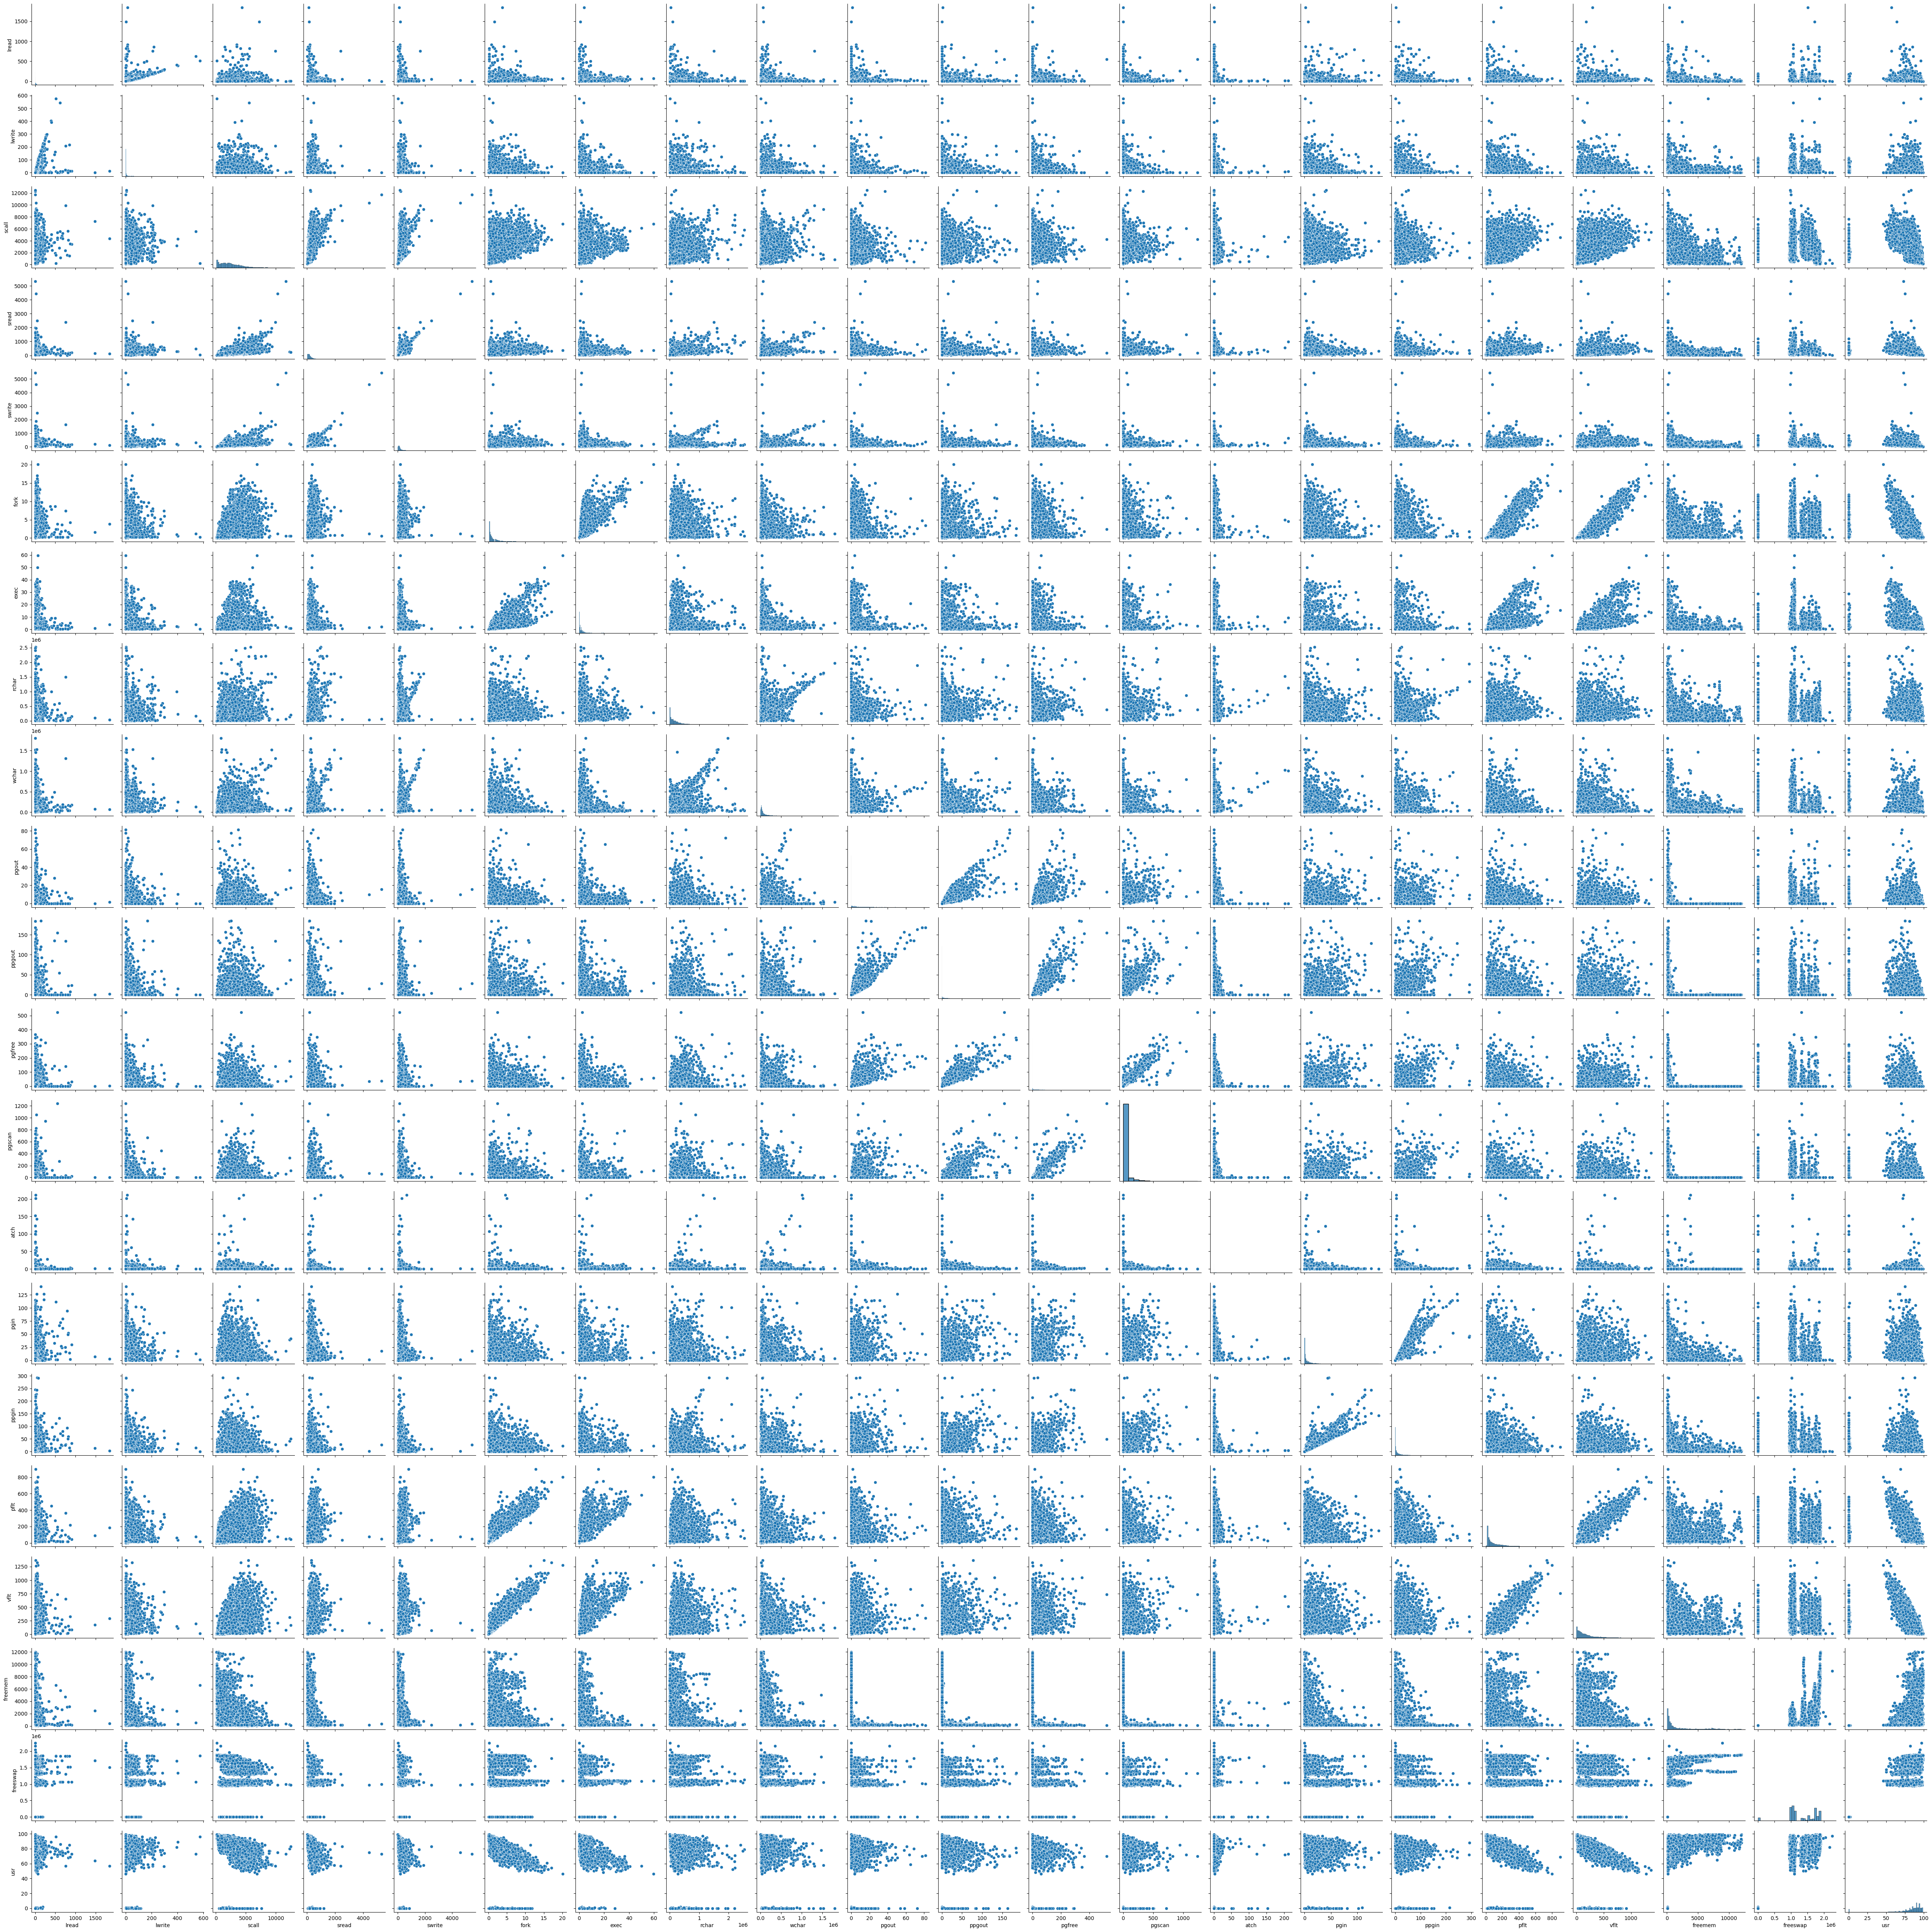

In [95]:
sns.pairplot(data=df);

### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of creating new features if required. Also check for outliers and duplicates if there.

In [96]:
df.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [4]:
df['rchar'] = df['rchar'].fillna(df['rchar'].median())

In [5]:
df['wchar'] = df['wchar'].fillna(df['wchar'].median())

In [99]:
df.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

In [100]:
df.duplicated().sum()

0

In [101]:
df.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap', 'usr'],
      dtype='object')

### Get the count of Zeros in column

In [102]:
count1 = (df['lread'] == 0).sum()
print('Count of zeros in Column  lread : ', count1)
count2 = (df['lwrite'] == 0).sum()
print('Count of zeros in Column  lwrite : ', count2)
count3 = (df['scall'] == 0).sum()
print('Count of zeros in Column  scall : ', count3)
count4 = (df['sread'] == 0).sum()
print('Count of zeros in Column  sread : ', count4)
count5 = (df['swrite'] == 0).sum()
print('Count of zeros in Column  swrite : ', count5)
count6 = (df['fork'] == 0).sum()
print('Count of zeros in Column  fork : ', count6)
count7 = (df['exec'] == 0).sum()
print('Count of zeros in Column  exec : ', count7)
count8 = (df['rchar'] == 0).sum()
print('Count of zeros in Column  rchar : ', count8)
count9 = (df['wchar'] == 0).sum()
print('Count of zeros in Column  wchar : ', count9)
count10 = (df['pgout'] == 0).sum()
print('Count of zeros in Column  pgout : ', count10)
count11 = (df['ppgout'] == 0).sum()
print('Count of zeros in Column  ppgout : ', count11)
count12 = (df['pgfree'] == 0).sum()
print('Count of zeros in Column  pgfree : ', count12)
count13 = (df['pgscan'] == 0).sum()
print('Count of zeros in Column  pgscan : ', count13)
count14 = (df['atch'] == 0).sum()
print('Count of zeros in Column  atch : ', count14)
count15 = (df['pgin'] == 0).sum()
print('Count of zeros in Column  pgin : ', count15)
count16 = (df['ppgin'] == 0).sum()
print('Count of zeros in Column  ppgin : ', count16)
count17 = (df['pflt'] == 0).sum()
print('Count of zeros in Column  pflt : ', count17)
count18 = (df['vflt'] == 0).sum()
print('Count of zeros in Column  vflt : ', count18)
count19 = (df['runqsz'] == 0).sum()
print('Count of zeros in Column  runqsz : ', count18)
count20 = (df['freemem'] == 0).sum()
print('Count of zeros in Column  freemem : ', count18)
count21 = (df['freeswap'] == 0).sum()
print('Count of zeros in Column  freeswap : ', count18)
count22 = (df['usr'] == 0).sum()
print('Count of zeros in Column  usr : ', count18)

Count of zeros in Column  lread :  675
Count of zeros in Column  lwrite :  2684
Count of zeros in Column  scall :  0
Count of zeros in Column  sread :  0
Count of zeros in Column  swrite :  0
Count of zeros in Column  fork :  21
Count of zeros in Column  exec :  21
Count of zeros in Column  rchar :  0
Count of zeros in Column  wchar :  0
Count of zeros in Column  pgout :  4878
Count of zeros in Column  ppgout :  4878
Count of zeros in Column  pgfree :  4869
Count of zeros in Column  pgscan :  6448
Count of zeros in Column  atch :  4575
Count of zeros in Column  pgin :  1220
Count of zeros in Column  ppgin :  1220
Count of zeros in Column  pflt :  3
Count of zeros in Column  vflt :  0
Count of zeros in Column  runqsz :  0
Count of zeros in Column  freemem :  0
Count of zeros in Column  freeswap :  0
Count of zeros in Column  usr :  0


In [103]:
df.shape

(8192, 22)

I tried with droping variables which have so many zeros but There are no change in multicoleaniarity Hence no need to drop the variable or change it we should change it because after change the variable it could change whole meaning of the variable.So we should keep it as they are.

### 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [104]:
from scipy.stats import pearsonr

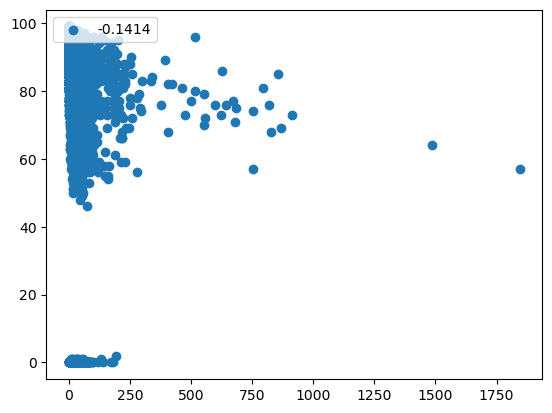

In [105]:
# checking for linear relationship between usr and lread
plt.scatter(df['lread'],df['usr'],label=round(pearsonr(df['lread'],df['usr'])[0],4))
plt.legend(loc='upper left');

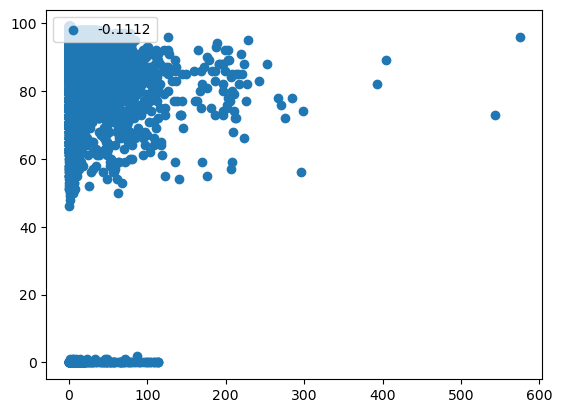

In [106]:
# checking for linear relationship between usr and lwrite
plt.scatter(df['lwrite'],df['usr'],label=round(pearsonr(df['lwrite'],df['usr'])[0],4))
plt.legend(loc='upper left');

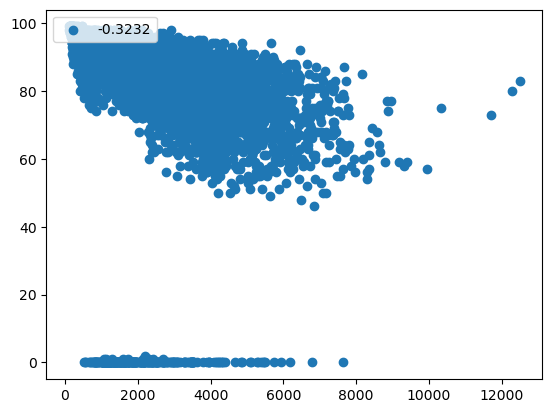

In [107]:
# checking for linear relationship between usr and scall
plt.scatter(df['scall'],df['usr'],label=round(pearsonr(df['scall'],df['usr'])[0],4))
plt.legend(loc='upper left');

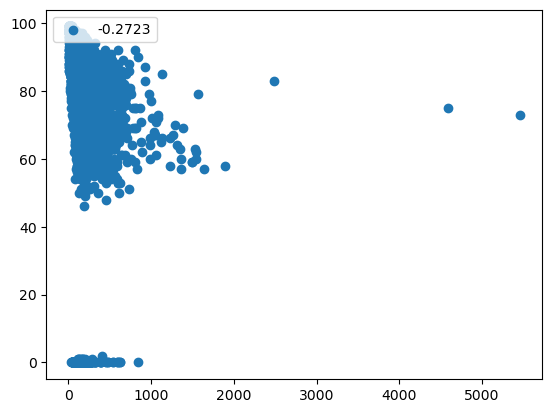

In [108]:
# checking for linear relationship between usr and swrite
plt.scatter(df['swrite'],df['usr'],label=round(pearsonr(df['swrite'],df['usr'])[0],4))
plt.legend(loc='upper left');

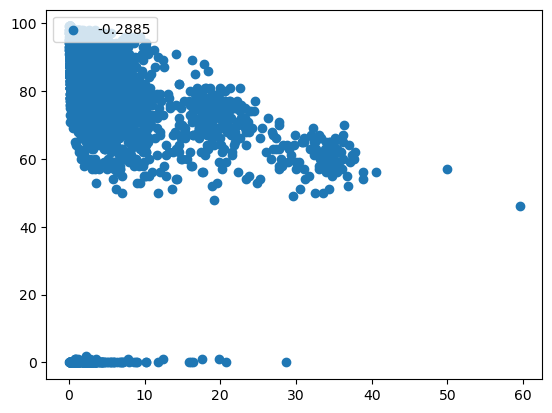

In [109]:
# checking for linear relationship between usr and exec
plt.scatter(df['exec'],df['usr'],label=round(pearsonr(df['exec'],df['usr'])[0],4))
plt.legend(loc='upper left');

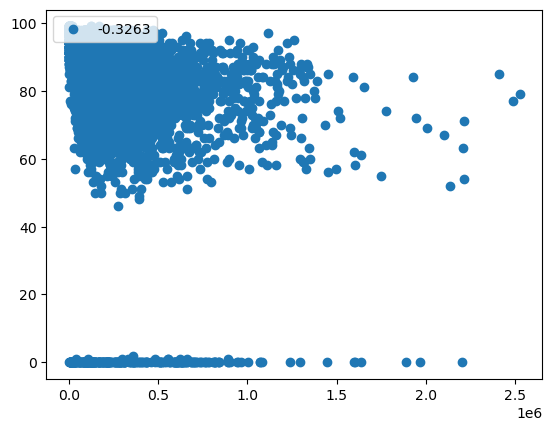

In [110]:
# checking for linear relationship between usr and rchar
plt.scatter(df['rchar'],df['usr'],label=round(pearsonr(df['rchar'],df['usr'])[0],4))
plt.legend(loc='upper left');

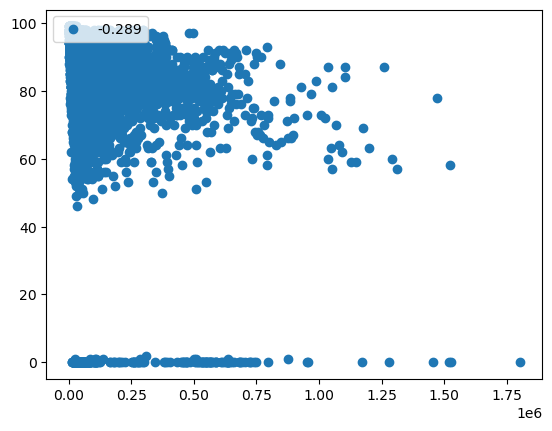

In [111]:
# checking for linear relationship between usr and wchar
plt.scatter(df['wchar'],df['usr'],label=round(pearsonr(df['wchar'],df['usr'])[0],4))
plt.legend(loc='upper left');

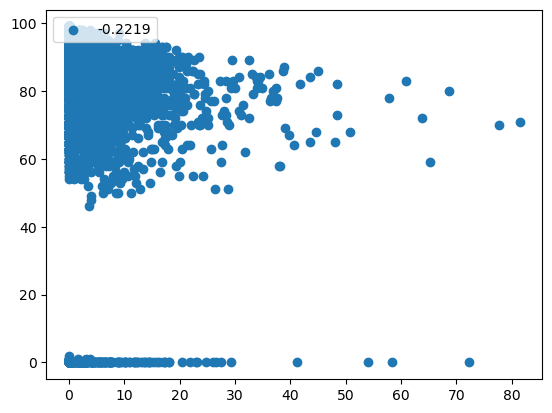

In [112]:
# checking for linear relationship between usr and pgout
plt.scatter(df['pgout'],df['usr'],label=round(pearsonr(df['pgout'],df['usr'])[0],4))
plt.legend(loc='upper left');

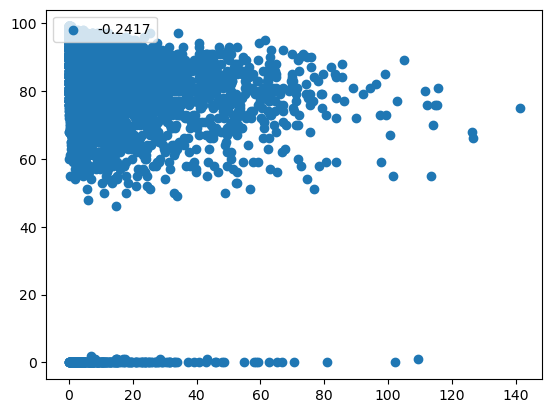

In [113]:
# checking for linear relationship between usr and pgin
plt.scatter(df['pgin'],df['usr'],label=round(pearsonr(df['pgin'],df['usr'])[0],4))
plt.legend(loc='upper left');

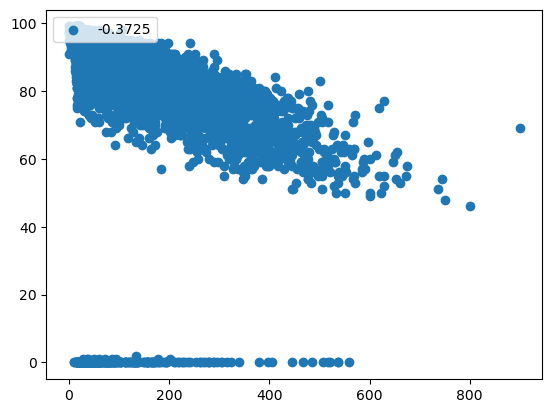

In [114]:
# checking for linear relationship between usr and pflt
plt.scatter(df['pflt'],df['usr'],label=round(pearsonr(df['pflt'],df['usr'])[0],4))
plt.legend(loc='upper left');

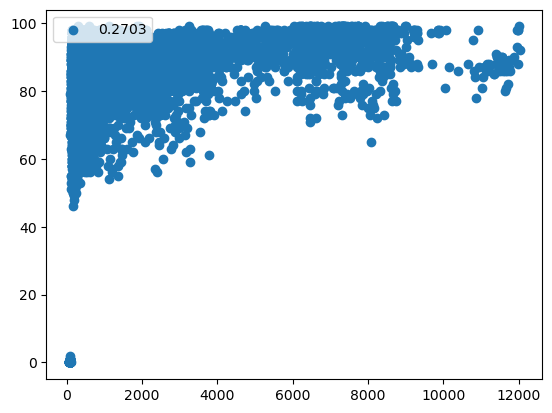

In [115]:
# checking for linear relationship between usr and freemem
plt.scatter(df['freemem'],df['usr'],label=round(pearsonr(df['freemem'],df['usr'])[0],4))
plt.legend(loc='upper left');

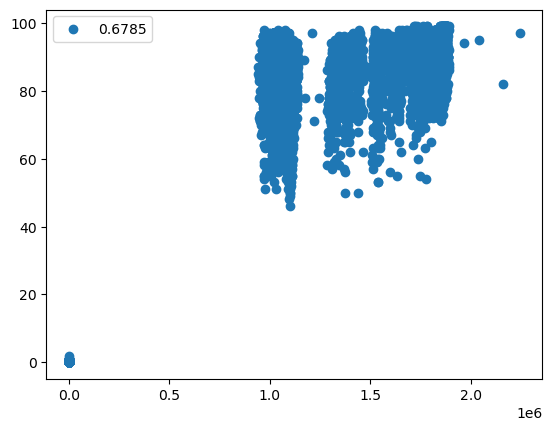

In [116]:
# checking for linear relationship between usr and freeswap
plt.scatter(df['freeswap'],df['usr'],label=round(pearsonr(df['freeswap'],df['usr'])[0],4))
plt.legend(loc='upper left');

In [117]:
df['runqsz'].unique()

array(['CPU_Bound', 'Not_CPU_Bound'], dtype=object)

In [6]:
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy.head()

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2   40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2     448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4  125473.5  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2  125473.5   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4  125473.5  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt  freemem  freeswap  usr  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40     4670   1730946   95   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83     7278   1869002   97   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20      702   1021237   87   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80     7248   1863704   98   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60      633   1760253   90   

   runqsz_Not_CPU_Bound  
0                     0  
1                     1  
2                     1  
3                     1  
4                     1  

[5 rows x 22 columns]

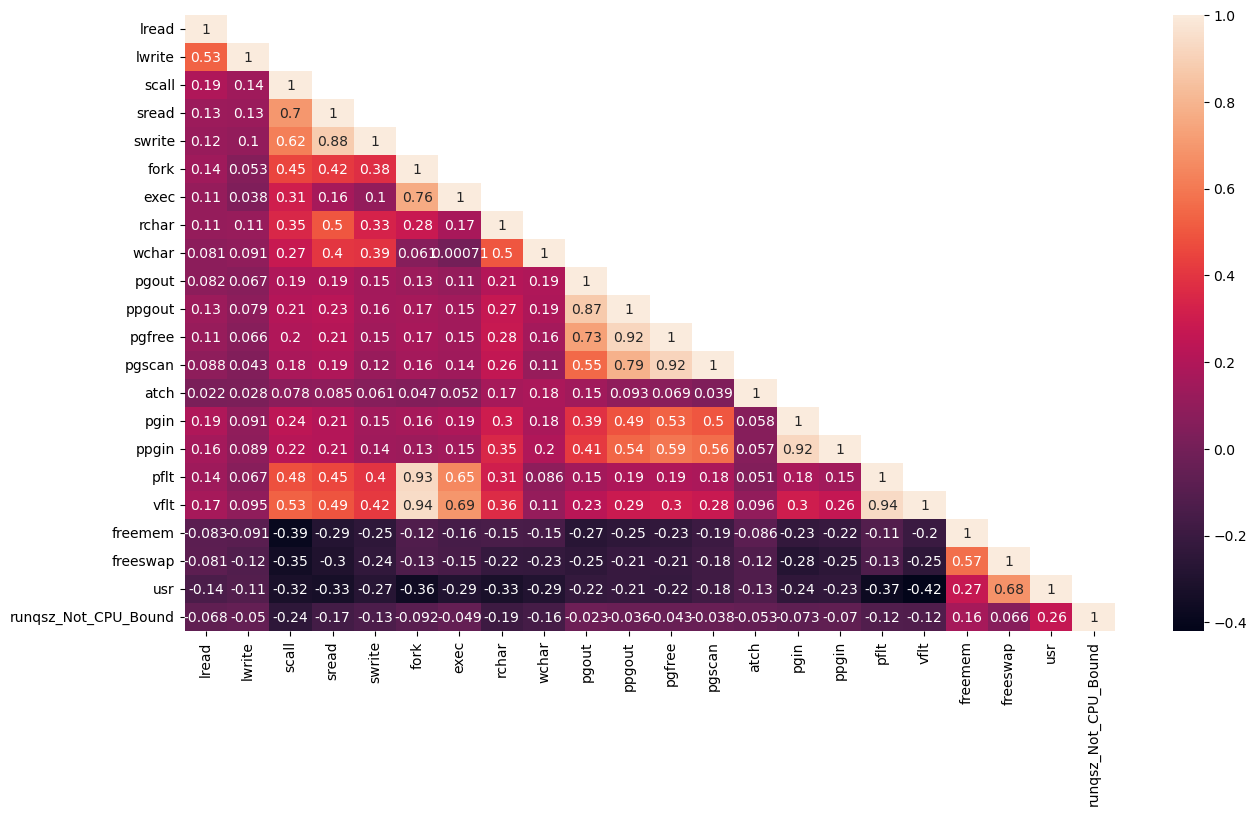

In [119]:
plt.figure(figsize=(15,8))
sns.heatmap(df_dummy.corr(),annot=True,mask=np.triu(df_dummy.corr(),+1))
plt.show()

In [7]:
# to build a regression here we use statmodel
import statsmodels.formula.api as SM

In [121]:
'+'.join(df.columns)

'lread+lwrite+scall+sread+swrite+fork+exec+rchar+wchar+pgout+ppgout+pgfree+pgscan+atch+pgin+ppgin+pflt+vflt+runqsz+freemem+freeswap+usr'

In [122]:
formula_MLR_0 = 'usr~lread'

In [123]:
model_MLR_0 = SM.ols(formula=formula_MLR_0,data=df_dummy).fit()
model_MLR_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     167.1
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           7.54e-38
Time:                        21:29:09   Log-Likelihood:                -35400.
No. Observations:                8192   AIC:                         7.080e+04
Df Residuals:                    8190   BIC:                         7.082e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     84.9227      0.214    396.122      0.000      84.502      85.343
lread         -0.0488      0.004    -12.926      0.000      -0.056      -0.041
==============================================================================
Omnibus:                     5895.784   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            75750.767
Skew:                          -3.470   Prob(JB):                         0.00
Kurtosis:                      16.182   Cond. No.                         60.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
formula_MLR_01 = 'usr~lwrite'

In [125]:
model_MLR_01 = SM.ols(formula=formula_MLR_01,data=df_dummy).fit()
model_MLR_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     102.6
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           5.77e-24
Time:                        21:29:09   Log-Likelihood:                -35431.
No. Observations:                8192   AIC:                         7.087e+04
Df Residuals:                    8190   BIC:                         7.088e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     84.8662      0.221    384.642      0.000      84.434      85.299
lwrite        -0.0685      0.007    -10.127      0.000      -0.082      -0.055
==============================================================================
Omnibus:                     5829.635   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72338.214
Skew:                          -3.430   Prob(JB):                         0.00
Kurtosis:                      15.840   Cond. No.                         35.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
formula_MLR_02 = 'usr~scall'

In [127]:
model_MLR_02 = SM.ols(formula=formula_MLR_02,data=df_dummy).fit()
model_MLR_02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     955.2
Date:                Thu, 24 Nov 2022   Prob (F-statistic):          1.74e-198
Time:                        21:29:09   Log-Likelihood:                -35030.
No. Observations:                8192   AIC:                         7.006e+04
Df Residuals:                    8190   BIC:                         7.008e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     92.3652      0.333    277.452      0.000      91.713      93.018
scall         -0.0036      0.000    -30.907      0.000      -0.004      -0.003
==============================================================================
Omnibus:                     6784.969   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           124274.764
Skew:                          -4.102   Prob(JB):                         0.00
Kurtosis:                      20.228   Cond. No.                     4.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [128]:
formula_MLR_03 = 'usr~swrite'

In [129]:
model_MLR_03 = SM.ols(formula=formula_MLR_03,data=df_dummy).fit()
model_MLR_03.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     655.6
Date:                Thu, 24 Nov 2022   Prob (F-statistic):          3.54e-139
Time:                        21:29:09   Log-Likelihood:                -35167.
No. Observations:                8192   AIC:                         7.034e+04
Df Residuals:                    8190   BIC:                         7.035e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     88.6535      0.268    330.969      0.000      88.128      89.179
swrite        -0.0312      0.001    -25.606      0.000      -0.034      -0.029
==============================================================================
Omnibus:                     6228.618   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           105321.334
Skew:                          -3.628   Prob(JB):                         0.00
Kurtosis:                      18.997   Cond. No.                         301.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
formula_MLR_04 = 'usr~exec'

In [131]:
model_MLR_04 = SM.ols(formula=formula_MLR_04,data=df_dummy).fit()
model_MLR_04.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     743.7
Date:                Thu, 24 Nov 2022   Prob (F-statistic):          8.07e-157
Time:                        21:29:09   Log-Likelihood:                -35126.
No. Observations:                8192   AIC:                         7.026e+04
Df Residuals:                    8190   BIC:                         7.027e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     86.8128      0.221    393.082      0.000      86.380      87.246
exec          -1.0186      0.037    -27.271      0.000      -1.092      -0.945
==============================================================================
Omnibus:                     6589.557   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           111558.775
Skew:                          -3.958   Prob(JB):                         0.00
Kurtosis:                      19.254   Cond. No.                         6.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
formula_MLR_05 = 'usr~rchar'

In [133]:
model_MLR_05 = SM.ols(formula=formula_MLR_05,data=df_dummy).fit()
model_MLR_05.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     975.7
Date:                Thu, 24 Nov 2022   Prob (F-statistic):          1.86e-202
Time:                        21:29:09   Log-Likelihood:                -35021.
No. Observations:                8192   AIC:                         7.005e+04
Df Residuals:                    8190   BIC:                         7.006e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     88.9159      0.249    357.024      0.000      88.428      89.404
rchar      -2.518e-05   8.06e-07    -31.236      0.000   -2.68e-05   -2.36e-05
==============================================================================
Omnibus:                     6045.177   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            86788.681
Skew:                          -3.546   Prob(JB):                         0.00
Kurtosis:                      17.282   Cond. No.                     4.00e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [134]:
formula_MLR_06 = 'usr~wchar'

In [135]:
model_MLR_06 = SM.ols(formula=formula_MLR_06,data=df_dummy).fit()
model_MLR_06.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     746.6
Date:                Thu, 24 Nov 2022   Prob (F-statistic):          2.16e-157
Time:                        21:29:09   Log-Likelihood:                -35125.
No. Observations:                8192   AIC:                         7.025e+04
Df Residuals:                    8190   BIC:                         7.027e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     87.5901      0.235    371.959      0.000      87.128      88.052
wchar      -3.779e-05   1.38e-06    -27.324      0.000   -4.05e-05   -3.51e-05
==============================================================================
Omnibus:                     5818.447   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            75174.862
Skew:                          -3.400   Prob(JB):                         0.00
Kurtosis:                      16.191   Cond. No.                     2.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [136]:
formula_MLR_07 = 'usr~pgout'

In [137]:
model_MLR_07 = SM.ols(formula=formula_MLR_07,data=df_dummy).fit()
model_MLR_07.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     424.1
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           6.58e-92
Time:                        21:29:09   Log-Likelihood:                -35275.
No. Observations:                8192   AIC:                         7.055e+04
Df Residuals:                    8190   BIC:                         7.057e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     85.7271      0.216    397.139      0.000      85.304      86.150
pgout         -0.7693      0.037    -20.593      0.000      -0.843      -0.696
==============================================================================
Omnibus:                     5950.816   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79026.845
Skew:                          -3.502   Prob(JB):                         0.00
Kurtosis:                      16.508   Cond. No.                         6.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
formula_MLR_08 = 'usr~pgin'

In [139]:
model_MLR_08 = SM.ols(formula=formula_MLR_08,data=df_dummy).fit()
model_MLR_08.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     508.2
Date:                Thu, 24 Nov 2022   Prob (F-statistic):          3.09e-109
Time:                        21:29:09   Log-Likelihood:                -35236.
No. Observations:                8192   AIC:                         7.048e+04
Df Residuals:                    8190   BIC:                         7.049e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     86.6227      0.230    377.036      0.000      86.172      87.073
pgin          -0.3206      0.014    -22.544      0.000      -0.348      -0.293
==============================================================================
Omnibus:                     6090.677   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            85026.612
Skew:                          -3.600   Prob(JB):                         0.00
Kurtosis:                      17.045   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
formula_MLR_09 = 'usr~pflt'

In [141]:
model_MLR_09 = SM.ols(formula=formula_MLR_09,data=df_dummy).fit()
model_MLR_09.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     1319.
Date:                Thu, 24 Nov 2022   Prob (F-statistic):          5.29e-268
Time:                        21:29:09   Log-Likelihood:                -34870.
No. Observations:                8192   AIC:                         6.974e+04
Df Residuals:                    8190   BIC:                         6.976e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     90.5464      0.262    346.227      0.000      90.034      91.059
pflt          -0.0599      0.002    -36.324      0.000      -0.063      -0.057
==============================================================================
Omnibus:                     7153.341   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           151968.515
Skew:                          -4.382   Prob(JB):                         0.00
Kurtosis:                      22.194   Cond. No.                         220.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
formula_MLR_010 = 'usr~freemem'

In [143]:
model_MLR_010 = SM.ols(formula=formula_MLR_010,data=df_dummy).fit()
model_MLR_010.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     645.6
Date:                Thu, 24 Nov 2022   Prob (F-statistic):          3.77e-137
Time:                        21:29:09   Log-Likelihood:                -35171.
No. Observations:                8192   AIC:                         7.035e+04
Df Residuals:                    8190   BIC:                         7.036e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.4349      0.240    334.952      0.000      79.964      80.906
freemem        0.0020   7.89e-05     25.408      0.000       0.002       0.002
==============================================================================
Omnibus:                     5736.726   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69077.706
Skew:                          -3.365   Prob(JB):                         0.00
Kurtosis:                      15.534   Cond. No.                     3.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [144]:
formula_MLR_011 = 'usr~freeswap'

In [145]:
model_MLR_011 = SM.ols(formula=formula_MLR_011,data=df_dummy).fit()
model_MLR_011.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     6988.
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:29:09   Log-Likelihood:                -32955.
No. Observations:                8192   AIC:                         6.591e+04
Df Residuals:                    8190   BIC:                         6.593e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.6740      0.493     90.574      0.000      43.707      45.641
freeswap    2.959e-05   3.54e-07     83.593      0.000    2.89e-05    3.03e-05
==============================================================================
Omnibus:                     1637.012   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3583.396
Skew:                          -1.154   Prob(JB):                         0.00
Kurtosis:                       5.275   Cond. No.                     4.60e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [146]:
formula_MLR_012 = 'usr~runqsz_Not_CPU_Bound'

In [147]:
model_MLR_012 = SM.ols(formula=formula_MLR_012,data=df_dummy).fit()
model_MLR_012.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     603.5
Date:                Thu, 24 Nov 2022   Prob (F-statistic):          1.19e-128
Time:                        21:29:09   Log-Likelihood:                -35191.
No. Observations:                8192   AIC:                         7.039e+04
Df Residuals:                    8190   BIC:                         7.040e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               78.8632      0.286    275.915      0.000      78.303      79.424
runqsz_Not_CPU_Bound     9.6572      0.393     24.567      0.000       8.887      10.428
==============================================================================
Omnibus:                     5390.195   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56271.990
Skew:                          -3.142   Prob(JB):                         0.00
Kurtosis:                      14.197   Cond. No.                         2.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
formula_MLR_1 = 'usr~lread+lwrite+scall+sread+swrite+fork+exec+rchar+wchar+pgout+ppgout+pgfree+pgscan+atch+pgin+ppgin+pflt+vflt+freemem+freeswap+runqsz_Not_CPU_Bound'

In [9]:
model_MLR_1 = SM.ols(formula=formula_MLR_1,data=df_dummy).fit()
model_MLR_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     692.0
Date:                Sat, 26 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:19:30   Log-Likelihood:                -31296.
No. Observations:                8192   AIC:                         6.264e+04
Df Residuals:                    8170   BIC:                         6.279e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               42.8406      0.623     68.749      0.000      41.619      44.062
lread                   -0.0198      0.003     -7.088      0.000      -0.025      -0.014
lwrite                   0.0074      0.005      1.522      0.128      -0.002       0.017
scall                    0.0010      0.000      8.759      0.000       0.001       0.001
sread                -9.749e-05      0.002     -0.061      0.952      -0.003       0.003
swrite                  -0.0016      0.002     -0.889      0.374      -0.005       0.002
fork                    -1.8871      0.209     -9.039      0.000      -2.296      -1.478
exec                    -0.0416      0.041     -1.013      0.311      -0.122       0.039
rchar                -3.657e-06   7.19e-07     -5.084      0.000   -5.07e-06   -2.25e-06
wchar                -1.066e-05    1.1e-06     -9.731      0.000   -1.28e-05   -8.51e-06
pgout                   -0.2048      0.054     -3.799      0.000      -0.310      -0.099
ppgout                   0.1270      0.031      4.109      0.000       0.066       0.188
pgfree                  -0.0880      0.016     -5.553      0.000      -0.119      -0.057
pgscan                   0.0125      0.005      2.644      0.008       0.003       0.022
atch                    -0.0396      0.022     -1.773      0.076      -0.083       0.004
pgin                     0.0581      0.024      2.383      0.017       0.010       0.106
ppgin                   -0.0392      0.016     -2.507      0.012      -0.070      -0.009
pflt                    -0.0401      0.004    -11.182      0.000      -0.047      -0.033
vflt                     0.0228      0.003      8.215      0.000       0.017       0.028
freemem                 -0.0017   6.37e-05    -26.141      0.000      -0.002      -0.002
freeswap              3.325e-05   3.82e-07     87.082      0.000    3.25e-05     3.4e-05
runqsz_Not_CPU_Bound     7.9475      0.258     30.828      0.000       7.442       8.453
==============================================================================
Omnibus:                     1928.707   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5359.778
Skew:                          -1.244   Prob(JB):                         0.00
Kurtosis:                       6.084   Cond. No.                     7.28e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=SM.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [11]:
print('For the first MLR model:','\n')

print('Rsquared',model_MLR_1.rsquared)
print('Adjusted Rsquared',model_MLR_1.rsquared_adj)

For the first MLR model: 

Rsquared 0.6401324193780404
Adjusted Rsquared 0.6392074231487797


In [152]:
vif_cal(input_data=df_dummy[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar','pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']])

lread  VIF =  1.49
lwrite  VIF =  1.43
scall  VIF =  2.48
sread  VIF =  6.87
swrite  VIF =  5.4
fork  VIF =  17.97
exec  VIF =  3.07
rchar  VIF =  1.97
wchar  VIF =  1.59
pgout  VIF =  5.49
ppgout  VIF =  14.83
pgfree  VIF =  17.63
pgscan  VIF =  7.6
atch  VIF =  1.09
pgin  VIF =  7.66
ppgin  VIF =  8.14
pflt  VIF =  11.29
vflt  VIF =  18.83
freemem  VIF =  1.67
freeswap  VIF =  1.74
runqsz_Not_CPU_Bound  VIF =  1.11


# Model without the 'vflt' variable

In [12]:
formula_MLR_2 = 'usr~lread+lwrite+scall+sread+swrite+fork+exec+rchar+wchar+pgout+ppgout+pgfree+pgscan+atch+pgin+ppgin+pflt+freemem+freeswap+runqsz_Not_CPU_Bound'

In [13]:
model_MLR_2 = SM.ols(formula=formula_MLR_2,data=df_dummy).fit()
# model_MLR_2.summary()

In [14]:
print('For the second MLR model:','\n')

print('Rsquared',model_MLR_2.rsquared)
print('Adjusted Rsquared',model_MLR_2.rsquared_adj)

For the second MLR model: 

Rsquared 0.6371594972102304
Adjusted Rsquared 0.6362713794699544


In [156]:
vif_cal(input_data=df_dummy[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']])

lread  VIF =  1.49
lwrite  VIF =  1.43
scall  VIF =  2.43
sread  VIF =  6.82
swrite  VIF =  5.36
fork  VIF =  12.29
exec  VIF =  3.06
rchar  VIF =  1.96
wchar  VIF =  1.58
pgout  VIF =  5.48
ppgout  VIF =  14.83
pgfree  VIF =  17.43
pgscan  VIF =  7.6
atch  VIF =  1.07
pgin  VIF =  7.25
ppgin  VIF =  8.02
pflt  VIF =  8.72
freemem  VIF =  1.67
freeswap  VIF =  1.65
runqsz_Not_CPU_Bound  VIF =  1.11


# Model without the 'pgfree' variable

In [157]:
formula_MLR_3 = 'usr~lread+lwrite+scall+sread+swrite+fork+exec+rchar+wchar+pgout+ppgout+pgscan+atch+pgin+ppgin+pflt+freemem+freeswap+runqsz_Not_CPU_Bound'

In [158]:
model_MLR_3 = SM.ols(formula=formula_MLR_3,data=df_dummy).fit()
# model_MLR_3.summary()

In [159]:
print('For the third MLR model:','\n')

print('Rsquared',model_MLR_3.rsquared)
print('Adjusted Rsquared',model_MLR_3.rsquared_adj)

For the third MLR model: 

Rsquared 0.6361874949460651
Adjusted Rsquared 0.635341626419875


In [160]:
vif_cal(input_data=df_dummy[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']])

lread  VIF =  1.49
lwrite  VIF =  1.43
scall  VIF =  2.43
sread  VIF =  6.8
swrite  VIF =  5.35
fork  VIF =  12.29
exec  VIF =  3.05
rchar  VIF =  1.96
wchar  VIF =  1.58
pgout  VIF =  5.47
ppgout  VIF =  9.8
pgscan  VIF =  3.46
atch  VIF =  1.07
pgin  VIF =  7.24
ppgin  VIF =  8.01
pflt  VIF =  8.71
freemem  VIF =  1.67
freeswap  VIF =  1.65
runqsz_Not_CPU_Bound  VIF =  1.11


# Model without the 'fork' variable

In [161]:
formula_MLR_4 = 'usr~lread+lwrite+scall+sread+swrite+exec+rchar+wchar+pgout+ppgout+pgscan+atch+pgin+ppgin+pflt+freemem+freeswap+runqsz_Not_CPU_Bound'

In [162]:
model_MLR_4 = SM.ols(formula=formula_MLR_4,data=df_dummy).fit()
# model_MLR_3.summary()

In [163]:
print('For the fourth MLR model:','\n')

print('Rsquared',model_MLR_4.rsquared)
print('Adjusted Rsquared',model_MLR_4.rsquared_adj)

For the fourth MLR model: 

Rsquared 0.6349424162152141
Adjusted Rsquared 0.6341384230048719


In [164]:
vif_cal(input_data=df_dummy[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']])

lread  VIF =  1.49
lwrite  VIF =  1.42
scall  VIF =  2.41
sread  VIF =  6.79
swrite  VIF =  5.2
exec  VIF =  1.9
rchar  VIF =  1.96
wchar  VIF =  1.57
pgout  VIF =  5.47
ppgout  VIF =  9.8
pgscan  VIF =  3.46
atch  VIF =  1.07
pgin  VIF =  7.24
ppgin  VIF =  8.01
pflt  VIF =  2.36
freemem  VIF =  1.67
freeswap  VIF =  1.65
runqsz_Not_CPU_Bound  VIF =  1.11


# Model without the 'ppgout' variable

In [165]:
formula_MLR_5 = 'usr~lread+lwrite+scall+sread+swrite+exec+rchar+wchar+pgout+pgscan+atch+pgin+ppgin+pflt+freemem+freeswap+runqsz_Not_CPU_Bound'

In [166]:
model_MLR_5 = SM.ols(formula=formula_MLR_5,data=df_dummy).fit()
# model_MLR_3.summary()

In [167]:
print('For the fifth MLR model:','\n')

print('Rsquared',model_MLR_5.rsquared)
print('Adjusted Rsquared',model_MLR_5.rsquared_adj)

For the fifth MLR model: 

Rsquared 0.6348347241300614
Adjusted Rsquared 0.6340752661303319


In [168]:
vif_cal(input_data=df_dummy[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'exec', 'rchar',
       'wchar', 'pgout', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']])

lread  VIF =  1.47
lwrite  VIF =  1.42
scall  VIF =  2.41
sread  VIF =  6.77
swrite  VIF =  5.19
exec  VIF =  1.9
rchar  VIF =  1.96
wchar  VIF =  1.57
pgout  VIF =  1.58
pgscan  VIF =  1.86
atch  VIF =  1.07
pgin  VIF =  7.23
ppgin  VIF =  7.95
pflt  VIF =  2.36
freemem  VIF =  1.67
freeswap  VIF =  1.64
runqsz_Not_CPU_Bound  VIF =  1.11


# Model without the 'ppgin' variable

In [169]:
formula_MLR_6 = 'usr~lread+lwrite+scall+sread+swrite+exec+rchar+wchar+pgout+pgscan+atch+pgin+pflt+freemem+freeswap+runqsz_Not_CPU_Bound'

In [170]:
model_MLR_6 = SM.ols(formula=formula_MLR_6,data=df_dummy).fit()
# model_MLR_3.summary()

In [171]:
print('For the sixth MLR model:','\n')

print('Rsquared',model_MLR_6.rsquared)
print('Adjusted Rsquared',model_MLR_6.rsquared_adj)

For the sixth MLR model: 

Rsquared 0.6343388612251305
Adjusted Rsquared 0.6336231941645314


In [172]:
vif_cal(input_data=df_dummy[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'exec', 'rchar',
       'wchar', 'pgout', 'pgscan', 'atch', 'pgin',
       'pflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']])

lread  VIF =  1.47
lwrite  VIF =  1.42
scall  VIF =  2.41
sread  VIF =  6.77
swrite  VIF =  5.19
exec  VIF =  1.9
rchar  VIF =  1.91
wchar  VIF =  1.57
pgout  VIF =  1.58
pgscan  VIF =  1.72
atch  VIF =  1.07
pgin  VIF =  1.51
pflt  VIF =  2.36
freemem  VIF =  1.67
freeswap  VIF =  1.64
runqsz_Not_CPU_Bound  VIF =  1.11


# Model without the 'sread' variable

In [173]:
formula_MLR_7 = 'usr~lread+lwrite+scall+swrite+exec+rchar+wchar+pgout+pgscan+atch+pgin+pflt+freemem+freeswap+runqsz_Not_CPU_Bound'

In [174]:
model_MLR_7 = SM.ols(formula=formula_MLR_7,data=df_dummy).fit()
model_MLR_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     945.3
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:29:11   Log-Likelihood:                -31362.
No. Observations:                8192   AIC:                         6.276e+04
Df Residuals:                    8176   BIC:                         6.287e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               44.2090      0.605     73.067      0.000      43.023      45.395
lread                   -0.0205      0.003     -7.350      0.000      -0.026      -0.015
lwrite                   0.0109      0.005      2.214      0.027       0.001       0.020
scall                    0.0013      0.000     11.398      0.000       0.001       0.001
swrite                  -0.0033      0.001     -3.109      0.002      -0.005      -0.001
exec                    -0.1862      0.032     -5.734      0.000      -0.250      -0.123
rchar                 -3.47e-06   6.55e-07     -5.296      0.000   -4.75e-06   -2.19e-06
wchar                -1.103e-05   1.09e-06    -10.084      0.000   -1.32e-05   -8.88e-06
pgout                   -0.1388      0.029     -4.755      0.000      -0.196      -0.082
pgscan                  -0.0025      0.002     -1.092      0.275      -0.007       0.002
atch                    -0.0163      0.022     -0.732      0.464      -0.060       0.027
pgin                     0.0266      0.011      2.439      0.015       0.005       0.048
pflt                    -0.0404      0.002    -24.541      0.000      -0.044      -0.037
freemem                 -0.0017   6.41e-05    -25.837      0.000      -0.002      -0.002
freeswap              3.251e-05   3.72e-07     87.368      0.000    3.18e-05    3.32e-05
runqsz_Not_CPU_Bound     7.9460      0.260     30.595      0.000       7.437       8.455
==============================================================================
Omnibus:                     2002.518   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5708.152
Skew:                          -1.281   Prob(JB):                         0.00
Kurtosis:                       6.187   Cond. No.                     7.01e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [175]:
print('For the seventh MLR model:','\n')

print('Rsquared',model_MLR_7.rsquared)
print('Adjusted Rsquared',model_MLR_7.rsquared_adj)

For the seventh MLR model: 

Rsquared 0.6342749803148436
Adjusted Rsquared 0.6336040073090612


In [176]:
vif_cal(input_data=df_dummy[['lread', 'lwrite', 'scall', 'swrite', 'exec', 'rchar',
       'wchar', 'pgout', 'pgscan', 'atch', 'pgin',
       'pflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']])

lread  VIF =  1.47
lwrite  VIF =  1.42
scall  VIF =  2.18
swrite  VIF =  1.97
exec  VIF =  1.89
rchar  VIF =  1.61
wchar  VIF =  1.56
pgout  VIF =  1.58
pgscan  VIF =  1.71
atch  VIF =  1.07
pgin  VIF =  1.51
pflt  VIF =  2.34
freemem  VIF =  1.67
freeswap  VIF =  1.63
runqsz_Not_CPU_Bound  VIF =  1.11


# Model without the 'atch' variable

In [177]:
formula_MLR_8 = 'usr~lread+lwrite+scall+swrite+exec+rchar+wchar+pgout+pgscan+pgin+pflt+freemem+freeswap+runqsz_Not_CPU_Bound'

In [178]:
model_MLR_8 = SM.ols(formula=formula_MLR_8,data=df_dummy).fit()
model_MLR_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     1013.
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:29:11   Log-Likelihood:                -31362.
No. Observations:                8192   AIC:                         6.275e+04
Df Residuals:                    8177   BIC:                         6.286e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               44.1841      0.604     73.144      0.000      43.000      45.368
lread                   -0.0205      0.003     -7.349      0.000      -0.026      -0.015
lwrite                   0.0109      0.005      2.215      0.027       0.001       0.020
scall                    0.0013      0.000     11.401      0.000       0.001       0.001
swrite                  -0.0033      0.001     -3.088      0.002      -0.005      -0.001
exec                    -0.1869      0.032     -5.756      0.000      -0.251      -0.123
rchar                 -3.51e-06   6.53e-07     -5.375      0.000   -4.79e-06   -2.23e-06
wchar                -1.111e-05   1.09e-06    -10.204      0.000   -1.32e-05   -8.97e-06
pgout                   -0.1413      0.029     -4.877      0.000      -0.198      -0.085
pgscan                  -0.0024      0.002     -1.050      0.294      -0.007       0.002
pgin                     0.0267      0.011      2.457      0.014       0.005       0.048
pflt                    -0.0404      0.002    -24.538      0.000      -0.044      -0.037
freemem                 -0.0017   6.41e-05    -25.835      0.000      -0.002      -0.002
freeswap              3.253e-05   3.72e-07     87.520      0.000    3.18e-05    3.33e-05
runqsz_Not_CPU_Bound     7.9491      0.260     30.612      0.000       7.440       8.458
==============================================================================
Omnibus:                     2003.374   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5705.889
Skew:                          -1.282   Prob(JB):                         0.00
Kurtosis:                       6.185   Cond. No.                     7.00e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  7e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [179]:
print('For the eighth MLR model:','\n')

print('Rsquared',model_MLR_8.rsquared)
print('Adjusted Rsquared',model_MLR_8.rsquared_adj)

For the eighth MLR model: 

Rsquared 0.634251036672099
Adjusted Rsquared 0.6336248307913859


In [180]:
vif_cal(input_data=df_dummy[['lread', 'lwrite', 'scall', 'swrite', 'exec', 'rchar',
       'wchar', 'pgout', 'pgscan', 'pgin',
       'pflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']])

lread  VIF =  1.47
lwrite  VIF =  1.42
scall  VIF =  2.18
swrite  VIF =  1.97
exec  VIF =  1.89
rchar  VIF =  1.6
wchar  VIF =  1.55
pgout  VIF =  1.56
pgscan  VIF =  1.71
pgin  VIF =  1.51
pflt  VIF =  2.34
freemem  VIF =  1.67
freeswap  VIF =  1.62
runqsz_Not_CPU_Bound  VIF =  1.11


# Model without the 'pgscan' variable

In [15]:
formula_MLR_9 = 'usr~lread+lwrite+scall+swrite+exec+rchar+wchar+pgout+pgin+pflt+freemem+freeswap+runqsz_Not_CPU_Bound'

In [16]:
model_MLR_9 = SM.ols(formula=formula_MLR_9,data=df_dummy).fit()
model_MLR_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     1091.
Date:                Sat, 26 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:19:53   Log-Likelihood:                -31363.
No. Observations:                8192   AIC:                         6.275e+04
Df Residuals:                    8178   BIC:                         6.285e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               44.2213      0.603     73.331      0.000      43.039      45.403
lread                   -0.0205      0.003     -7.341      0.000      -0.026      -0.015
lwrite                   0.0110      0.005      2.233      0.026       0.001       0.021
scall                    0.0013      0.000     11.410      0.000       0.001       0.001
swrite                  -0.0033      0.001     -3.084      0.002      -0.005      -0.001
exec                    -0.1869      0.032     -5.755      0.000      -0.251      -0.123
rchar                -3.588e-06   6.49e-07     -5.530      0.000   -4.86e-06   -2.32e-06
wchar                -1.102e-05   1.09e-06    -10.154      0.000   -1.31e-05   -8.89e-06
pgout                   -0.1547      0.026     -5.951      0.000      -0.206      -0.104
pgin                     0.0229      0.010      2.234      0.026       0.003       0.043
pflt                    -0.0405      0.002    -24.593      0.000      -0.044      -0.037
freemem                 -0.0017   6.41e-05    -25.818      0.000      -0.002      -0.002
freeswap              3.251e-05   3.71e-07     87.535      0.000    3.18e-05    3.32e-05
runqsz_Not_CPU_Bound     7.9468      0.260     30.604      0.000       7.438       8.456
==============================================================================
Omnibus:                     2001.691   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5698.640
Skew:                          -1.281   Prob(JB):                         0.00
Kurtosis:                       6.183   Cond. No.                     6.99e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.99e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [183]:
print('For the ninth MLR model:','\n')

print('Rsquared',model_MLR_9.rsquared)
print('Adjusted Rsquared',model_MLR_9.rsquared_adj)

For the ninth MLR model: 

Rsquared 0.6342017662013718
Adjusted Rsquared 0.6336202820928634


In [184]:
vif_cal(input_data=df_dummy[['lread', 'lwrite', 'scall', 'swrite', 'exec', 'rchar',
       'wchar', 'pgout', 'pgin',
       'pflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']])

lread  VIF =  1.47
lwrite  VIF =  1.42
scall  VIF =  2.18
swrite  VIF =  1.97
exec  VIF =  1.89
rchar  VIF =  1.58
wchar  VIF =  1.54
pgout  VIF =  1.26
pgin  VIF =  1.34
pflt  VIF =  2.34
freemem  VIF =  1.67
freeswap  VIF =  1.62
runqsz_Not_CPU_Bound  VIF =  1.11


# Predict using model 9

Model 9 - Prediction and Scatterplot

In [17]:
model_MLR_9_pred = model_MLR_9.fittedvalues
model_MLR_9_pred

0        93.860133
1       100.271572
2        79.094155
3        99.706985
4       106.388688
           ...    
8187     68.938536
8188     80.947225
8189     82.356869
8190     78.814911
8191     96.120962
Length: 8192, dtype: float64

In [186]:
# This is predicted plot of usr

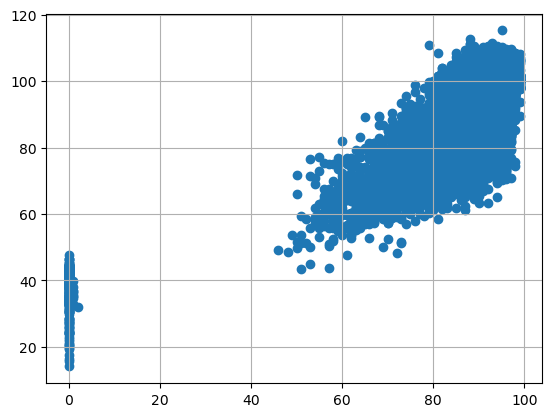

In [18]:
plt.scatter(df_dummy['usr'],model_MLR_9_pred)
plt.grid();

**Predicted value and actual value plot**

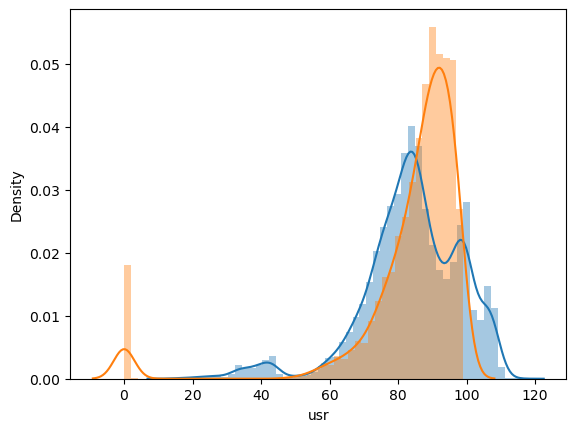

In [21]:
sns.distplot(model_MLR_9.fittedvalues)
sns.distplot(df_dummy['usr']);

**plot b/w predicted and residuals**'

**residuals = actual - predicted = Error**

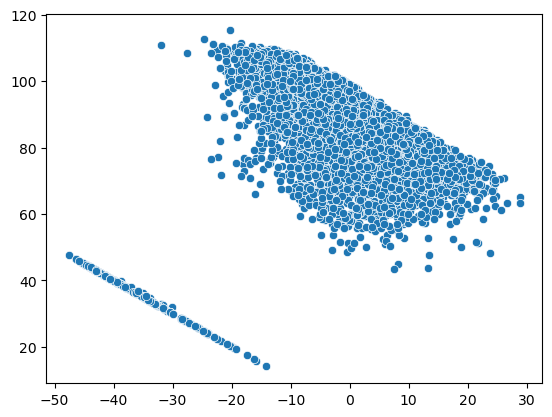

In [189]:
#Linear Relationship b/w Dependent and Independent Varaibles 

sns.scatterplot(model_MLR_9.resid,model_MLR_9.fittedvalues);

- There are so many positive error, negative error and zero error

In [190]:
# distribution plot of error and boxplot of error

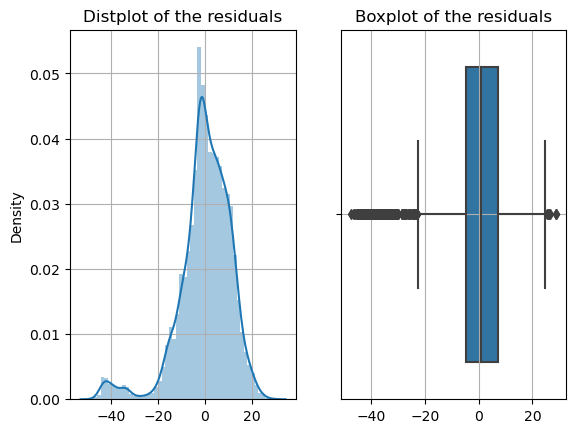

In [191]:
f,a =  plt.subplots(1,2,sharex=False,sharey=False,squeeze=False)


plot_0 = sns.distplot(model_MLR_9.resid,ax=a[0][0])
a[0][0].set_title('Distplot of the residuals')
a[0][0].grid()

plot_1 = sns.boxplot(model_MLR_9.resid,orient='v',ax=a[0][1])
a[0][1].set_title('Boxplot of the residuals')
a[0][1].grid()
plot_1;

# Prediction by using sklearn

In [192]:
from sklearn.linear_model import LinearRegression

In [193]:
lr = LinearRegression()

In [194]:
df_dummy.head()

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2   40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2     448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4  125473.5  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2  125473.5   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4  125473.5  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt  freemem  freeswap  usr  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40     4670   1730946   95   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83     7278   1869002   97   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20      702   1021237   87   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80     7248   1863704   98   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60      633   1760253   90   

   runqsz_Not_CPU_Bound  
0                     0  
1                     1  
2                     1  
3                     1  
4                     1  

[5 rows x 22 columns]

In [195]:
df_dummy.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'usr', 'runqsz_Not_CPU_Bound'],
      dtype='object')

In [196]:
X = df_dummy[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']].copy()
Y = df_dummy['usr']

In [197]:
from sklearn.model_selection import train_test_split

In [199]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [200]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(5734, 21)
(2458, 21)
(5734,)
(2458,)


In [201]:
model_9 = lr.fit(X_train[['lread', 'lwrite', 'scall', 'swrite', 'exec', 'rchar',
       'wchar', 'pgout', 'pgin',
       'pflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']],Y_train)

In [208]:
#Training Data Prediction

model_9_pred_train = model_9.predict(X_train[['lread', 'lwrite', 'scall', 'swrite', 'exec', 'rchar',
       'wchar', 'pgout', 'pgin',
       'pflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']])
print(model_9_pred_train)

[ 84.33392176  84.03738247  44.56995033 ...  76.13906443  81.6233943
 101.84921367]


In [209]:
#Test Data Prediction

model_9_pred_test = model_9.predict(X_test[['lread', 'lwrite', 'scall', 'swrite', 'exec', 'rchar',
       'wchar', 'pgout', 'pgin',
       'pflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']])
print(model_9_pred_test)

[99.58829348 79.75041039 43.43307965 ... 97.75473892 93.83957665
 72.41845121]


In [204]:
model_9.intercept_

46.03194087053571

In [210]:
print(model_9.coef_)

[-2.02973995e-02  8.20930277e-03  1.20307226e-03 -3.59325642e-03
 -2.14954873e-01 -4.28894535e-06 -1.22592747e-05 -1.53246743e-01
  2.74116268e-02 -3.99501147e-02 -1.60329118e-03  3.14621366e-05
  7.73009521e+00]


# RMSE check for all the model built

In [ ]:
# RMSE = root(mean square error)
# squared=False gives RMSE
# squared=True gives MSE

In [211]:
from sklearn.metrics import mean_squared_error, r2_score

In [212]:
print('Training Data RMSE of model_9:',mean_squared_error(Y_train,model_9_pred_train,squared=False))
print('Test Data RMSE of model_9:',mean_squared_error(Y_test,model_9_pred_test,squared=False))

Training Data RMSE of model_9: 10.898643690924867
Test Data RMSE of model_9: 11.680021884742956


In [214]:
print('Training Data R2 of model_9:',r2_score(Y_train,model_9_pred_train))
print('Test Data R2 of model_9:',r2_score(Y_test,model_9_pred_test))

Training Data R2 of model_9: 0.6371738477822823
Test Data R2 of model_9: 0.6257253205103614


# Scatteplot for the predictions

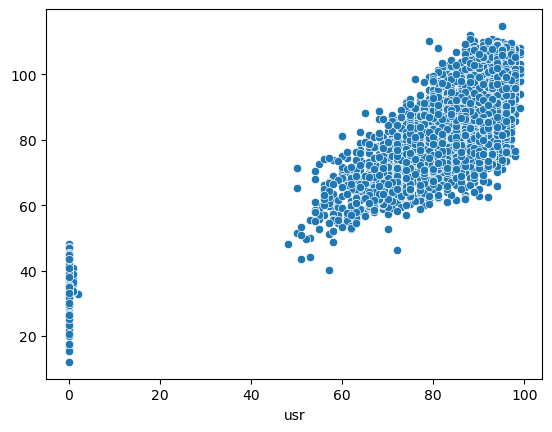

In [215]:
# Training Data
sns.scatterplot(Y_train,model_9_pred_train);

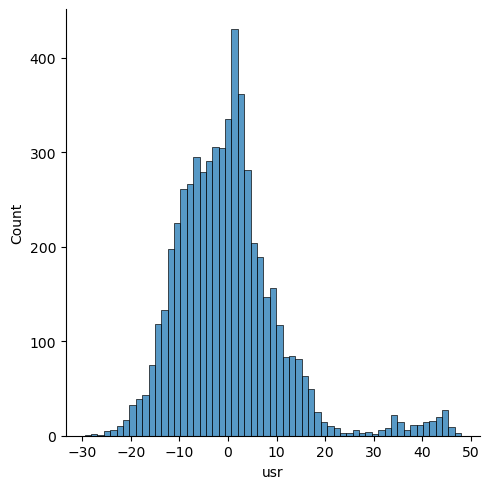

In [218]:
sns.displot(model_9_pred_train-Y_train);

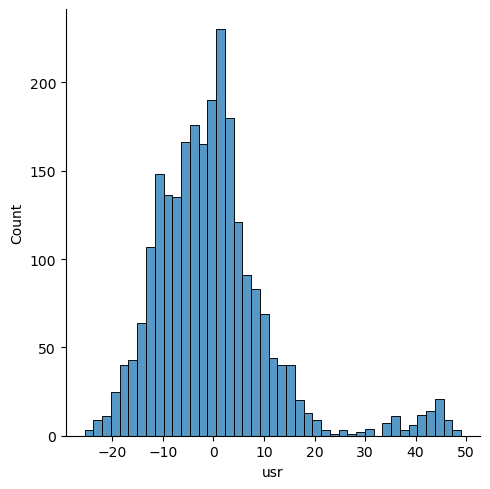

In [216]:
sns.displot(model_9_pred_test-Y_test);

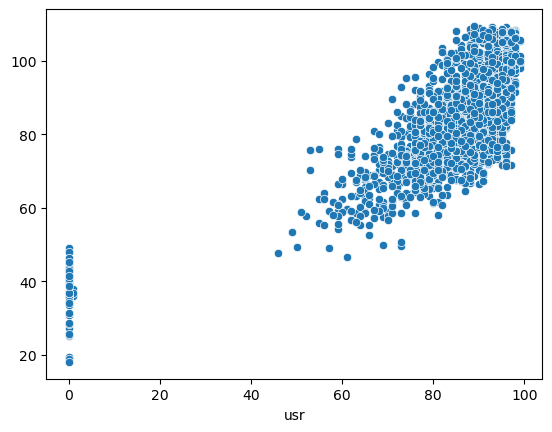

In [217]:
sns.scatterplot(Y_test,model_9_pred_test);

# END